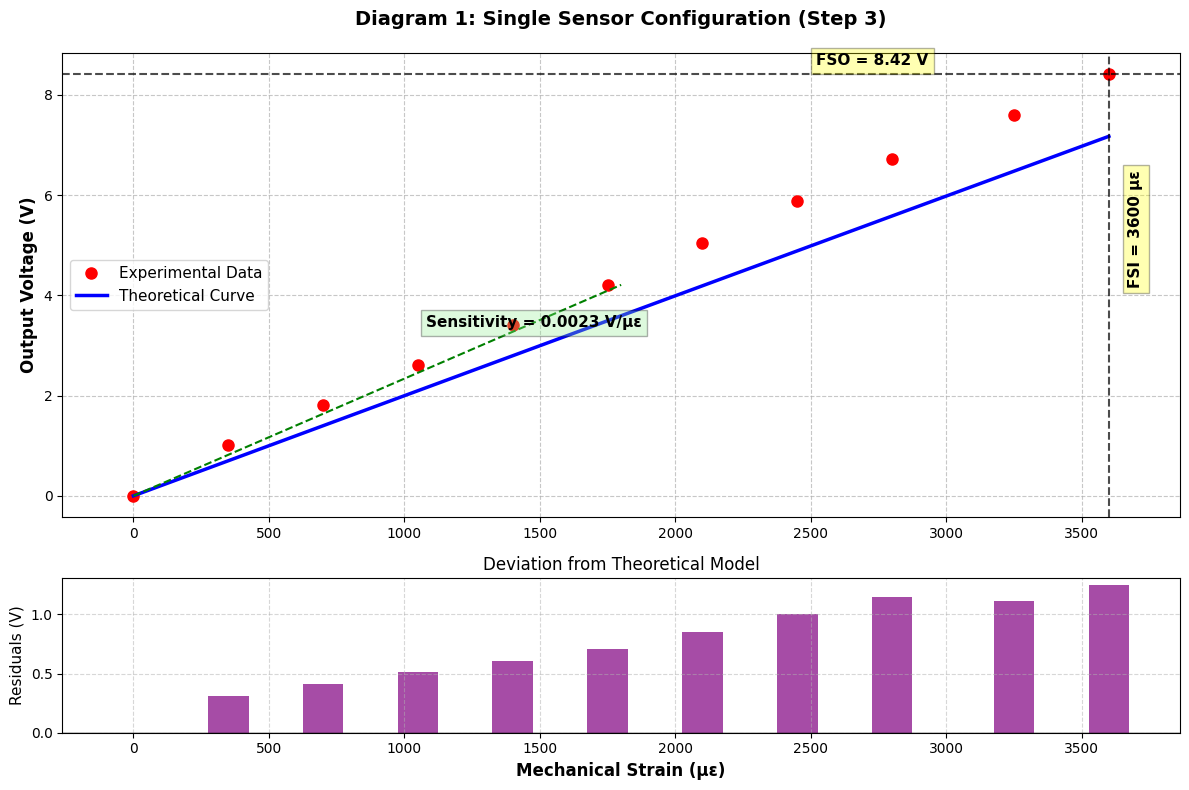

/tmp/ipython-input-2064307312.py:162: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ks-" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(strain_dual, hysteresis_diff, 'ks-', markersize=8, linewidth=2, color='darkred')


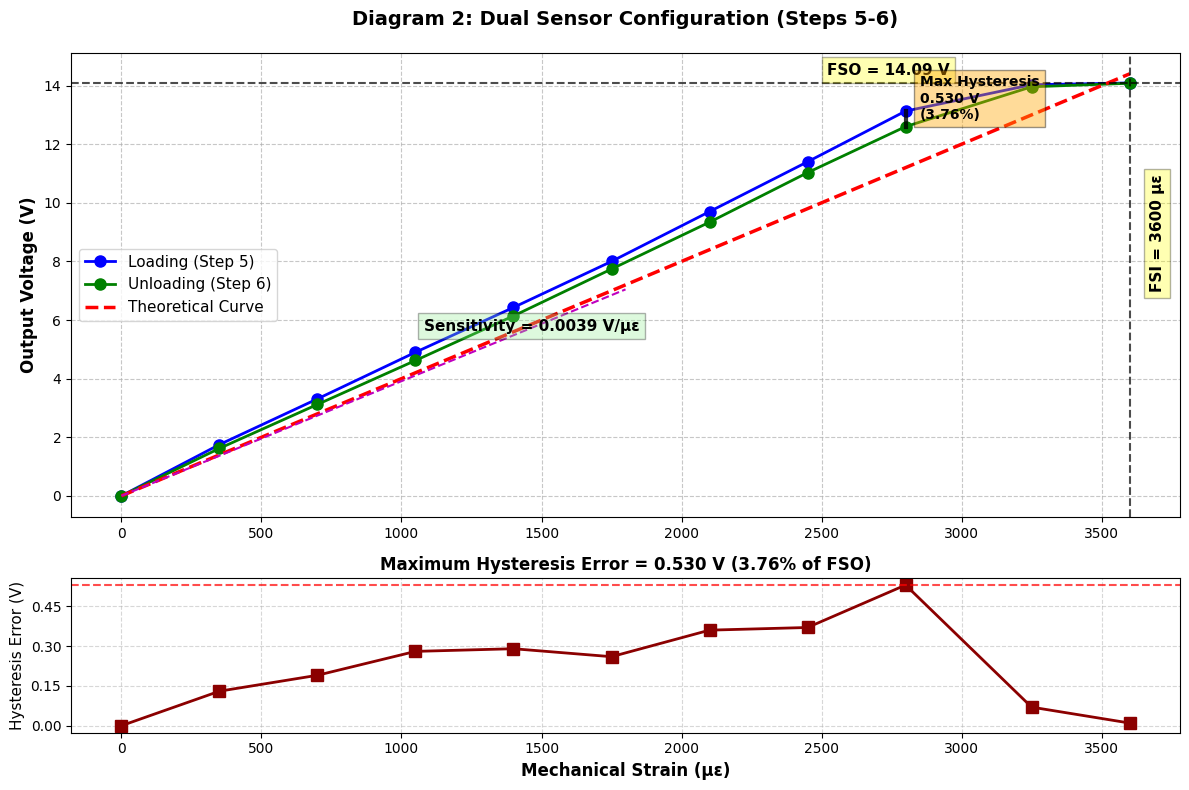

SINGLE SENSOR CONFIGURATION (Step 3):
Full Scale Input (FSI): 3600 με
Full Scale Output (FSO): 8.42 V
Sensitivity: 0.0023 V/με
Theoretical Sensitivity (ideal): 0.0020 V/με

DUAL SENSOR CONFIGURATION (Steps 5-6):
Full Scale Input (FSI): 3600 με
Full Scale Output (FSO): 14.09 V
Sensitivity: 0.0039 V/με
Theoretical Sensitivity (ideal): 0.0040 V/με

Maximum Hysteresis Error: 0.530 V
Hysteresis as Percentage of FSO: 3.76%
Observed at Strain: 2800 με

SENSITIVITY COMPARISON:
Dual sensor sensitivity is 1.7x higher than single sensor


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec

# ==============================
# DATA FROM EXPERIMENTS
# ==============================

# Table 1: Single sensor configuration (Step 3)
strain_single = np.array([0, 350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3250, 3600])  # in με
voltage_single = np.array([0, 1.01, 1.81, 2.61, 3.40, 4.20, 5.04, 5.89, 6.73, 7.59, 8.42])  # in V

# Table 2: Dual sensor configuration (Steps 5-6)
strain_dual = np.array([0, 350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3250, 3600])  # in με
voltage_loading = np.array([0, 1.75, 3.31, 4.90, 6.43, 8.00, 9.70, 11.40, 13.13, 14.03, 14.09])  # Loading (Step 5)
voltage_unloading = np.array([0, 1.62, 3.12, 4.62, 6.14, 7.74, 9.34, 11.03, 12.60, 13.96, 14.08])  # Unloading (Step 6)

# ==============================
# CALCULATIONS FOR SINGLE SENSOR
# ==============================
FSI_single = strain_single[-1]  # Full Scale Input = max strain = 3600 με
FSO_single = voltage_single[-1]  # Full Scale Output = output at FSI = 8.42 V
sensitivity_single = FSO_single / FSI_single  # Sensitivity in V/με

# Theoretical curve for single sensor configuration
G_f = 2.0  # Gauge factor
V_ex = 2.0  # Excitation voltage (V)
R = 120.0   # Base resistance (Ω)
Av = 2000   # Amplifier gain

def theoretical_voltage_single(strain_με):
    """Calculate theoretical output voltage for single sensor configuration"""
    strain = strain_με * 1e-6  # Convert με to unitless strain
    ΔR = G_f * R * strain      # Resistance change
    # Exact Wheatstone bridge formula for quarter bridge
    V_b = V_ex * (ΔR / (4 * R + 2 * ΔR))  # Bridge output voltage
    V_out = Av * V_b           # Amplified output
    return V_out

strain_fine = np.linspace(0, 3600, 100)  # Fine strain values for smooth curve
voltage_theoretical_single = theoretical_voltage_single(strain_fine)

# ==============================
# CALCULATIONS FOR DUAL SENSOR
# ==============================
FSI_dual = strain_dual[-1]  # Full Scale Input = 3600 με
FSO_dual = voltage_loading[-1]  # Full Scale Output (loading) = 14.09 V
sensitivity_dual = FSO_dual / FSI_dual  # Sensitivity in V/με

# Hysteresis calculation
hysteresis_diff = np.abs(voltage_loading - voltage_unloading)
max_hysteresis = np.max(hysteresis_diff)
max_hysteresis_idx = np.argmax(hysteresis_diff)
max_hysteresis_strain = strain_dual[max_hysteresis_idx]
hysteresis_percent = (max_hysteresis / FSO_dual) * 100

# Theoretical curve for dual sensor configuration
def theoretical_voltage_dual(strain_με):
    """Calculate theoretical output voltage for dual sensor (half-bridge) configuration"""
    strain = strain_με * 1e-6  # Convert με to unitless strain
    ΔR = G_f * R * strain      # Resistance change magnitude
    # Exact Wheatstone bridge formula for half-bridge differential
    V_b = V_ex * (2 * ΔR * R) / (4 * R**2 - ΔR**2)
    V_out = Av * V_b
    return V_out

voltage_theoretical_dual = theoretical_voltage_dual(strain_fine)

# ==============================
# PLOT 1: SINGLE SENSOR RESULTS
# ==============================
plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Main plot: Experimental vs Theoretical
ax1 = plt.subplot(gs[0])
ax1.plot(strain_single, voltage_single, 'ro', markersize=8, label='Experimental Data')
ax1.plot(strain_fine, voltage_theoretical_single, 'b-', linewidth=2.5, label='Theoretical Curve')
ax1.set_ylabel('Output Voltage (V)', fontsize=12, fontweight='bold')
ax1.set_title('Diagram 1: Single Sensor Configuration (Step 3)', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='best', fontsize=11)

# Annotate FSI and FSO
ax1.axvline(x=FSI_single, color='k', linestyle='--', alpha=0.7)
ax1.axhline(y=FSO_single, color='k', linestyle='--', alpha=0.7)
ax1.text(FSI_single * 0.7, FSO_single * 1.02,
         f'FSO = {FSO_single:.2f} V',
         fontsize=11, fontweight='bold', bbox=dict(facecolor='yellow', alpha=0.3))
ax1.text(FSI_single * 1.02, FSO_single * 0.5,
         f'FSI = {FSI_single} με',
         fontsize=11, fontweight='bold', rotation=90, bbox=dict(facecolor='yellow', alpha=0.3))

# Sensitivity annotation
mid_strain = FSI_single / 2
mid_voltage = sensitivity_single * mid_strain
ax1.plot([0, mid_strain], [0, mid_voltage], 'g--', linewidth=1.5)
ax1.text(mid_strain * 0.6, mid_voltage * 0.8,
         f'Sensitivity = {sensitivity_single:.4f} V/με',
         fontsize=11, fontweight='bold', bbox=dict(facecolor='lightgreen', alpha=0.3))

# Residuals plot
ax2 = plt.subplot(gs[1], sharex=ax1)
residuals = voltage_single - theoretical_voltage_single(strain_single)
ax2.bar(strain_single, residuals, width=150, color='purple', alpha=0.7)
ax2.axhline(y=0, color='k', linestyle='-', linewidth=1)
ax2.set_xlabel('Mechanical Strain (με)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Residuals (V)', fontsize=11)
ax2.set_title('Deviation from Theoretical Model', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('diagram1_single_sensor.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# PLOT 2: DUAL SENSOR RESULTS
# ==============================
plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Main plot: Loading vs Unloading
ax1 = plt.subplot(gs[0])
ax1.plot(strain_dual, voltage_loading, 'bo-', markersize=8, linewidth=2, label='Loading (Step 5)')
ax1.plot(strain_dual, voltage_unloading, 'go-', markersize=8, linewidth=2, label='Unloading (Step 6)')
ax1.plot(strain_fine, voltage_theoretical_dual, 'r--', linewidth=2.5, label='Theoretical Curve')
ax1.set_ylabel('Output Voltage (V)', fontsize=12, fontweight='bold')
ax1.set_title('Diagram 2: Dual Sensor Configuration (Steps 5-6)', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='best', fontsize=11)

# Annotate FSI and FSO
ax1.axvline(x=FSI_dual, color='k', linestyle='--', alpha=0.7)
ax1.axhline(y=FSO_dual, color='k', linestyle='--', alpha=0.7)
ax1.text(FSI_dual * 0.7, FSO_dual * 1.02,
         f'FSO = {FSO_dual:.2f} V',
         fontsize=11, fontweight='bold', bbox=dict(facecolor='yellow', alpha=0.3))
ax1.text(FSI_dual * 1.02, FSO_dual * 0.5,
         f'FSI = {FSI_dual} με',
         fontsize=11, fontweight='bold', rotation=90, bbox=dict(facecolor='yellow', alpha=0.3))

# Sensitivity annotation
mid_strain = FSI_dual / 2
mid_voltage = sensitivity_dual * mid_strain
ax1.plot([0, mid_strain], [0, mid_voltage], 'm--', linewidth=1.5)
ax1.text(mid_strain * 0.6, mid_voltage * 0.8,
         f'Sensitivity = {sensitivity_dual:.4f} V/με',
         fontsize=11, fontweight='bold', bbox=dict(facecolor='lightgreen', alpha=0.3))

# Hysteresis annotation
ax1.plot([max_hysteresis_strain, max_hysteresis_strain],
         [voltage_loading[max_hysteresis_idx], voltage_unloading[max_hysteresis_idx]],
         'k-', linewidth=3, alpha=0.8)
ax1.text(max_hysteresis_strain + 50,
         (voltage_loading[max_hysteresis_idx] + voltage_unloading[max_hysteresis_idx])/2,
         f'Max Hysteresis\n{max_hysteresis:.3f} V\n({hysteresis_percent:.2f}%)',
         fontsize=10, fontweight='bold', bbox=dict(facecolor='orange', alpha=0.4))

# Hysteresis error plot
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.plot(strain_dual, hysteresis_diff, 'ks-', markersize=8, linewidth=2, color='darkred')
ax2.axhline(y=max_hysteresis, color='r', linestyle='--', alpha=0.7)
ax2.set_xlabel('Mechanical Strain (με)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Hysteresis Error (V)', fontsize=11)
ax2.set_title(f'Maximum Hysteresis Error = {max_hysteresis:.3f} V ({hysteresis_percent:.2f}% of FSO)',
              fontsize=12, fontweight='bold')
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.yaxis.set_major_locator(MaxNLocator(5))

plt.tight_layout()
plt.savefig('diagram2_dual_sensor.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# CALCULATED VALUES SUMMARY
# ==============================
print("="*60)
print("SINGLE SENSOR CONFIGURATION (Step 3):")
print(f"Full Scale Input (FSI): {FSI_single} με")
print(f"Full Scale Output (FSO): {FSO_single:.2f} V")
print(f"Sensitivity: {sensitivity_single:.4f} V/με")
print(f"Theoretical Sensitivity (ideal): {0.002:.4f} V/με")  # From V_out = 0.002 * strain_με

print("\nDUAL SENSOR CONFIGURATION (Steps 5-6):")
print(f"Full Scale Input (FSI): {FSI_dual} με")
print(f"Full Scale Output (FSO): {FSO_dual:.2f} V")
print(f"Sensitivity: {sensitivity_dual:.4f} V/με")
print(f"Theoretical Sensitivity (ideal): {0.004:.4f} V/με")  # From V_out = 0.004 * strain_με
print(f"\nMaximum Hysteresis Error: {max_hysteresis:.3f} V")
print(f"Hysteresis as Percentage of FSO: {hysteresis_percent:.2f}%")
print(f"Observed at Strain: {max_hysteresis_strain} με")

print("\nSENSITIVITY COMPARISON:")
print(f"Dual sensor sensitivity is {sensitivity_dual/sensitivity_single:.1f}x higher than single sensor")
print("="*60)

/tmp/ipython-input-4085790732.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


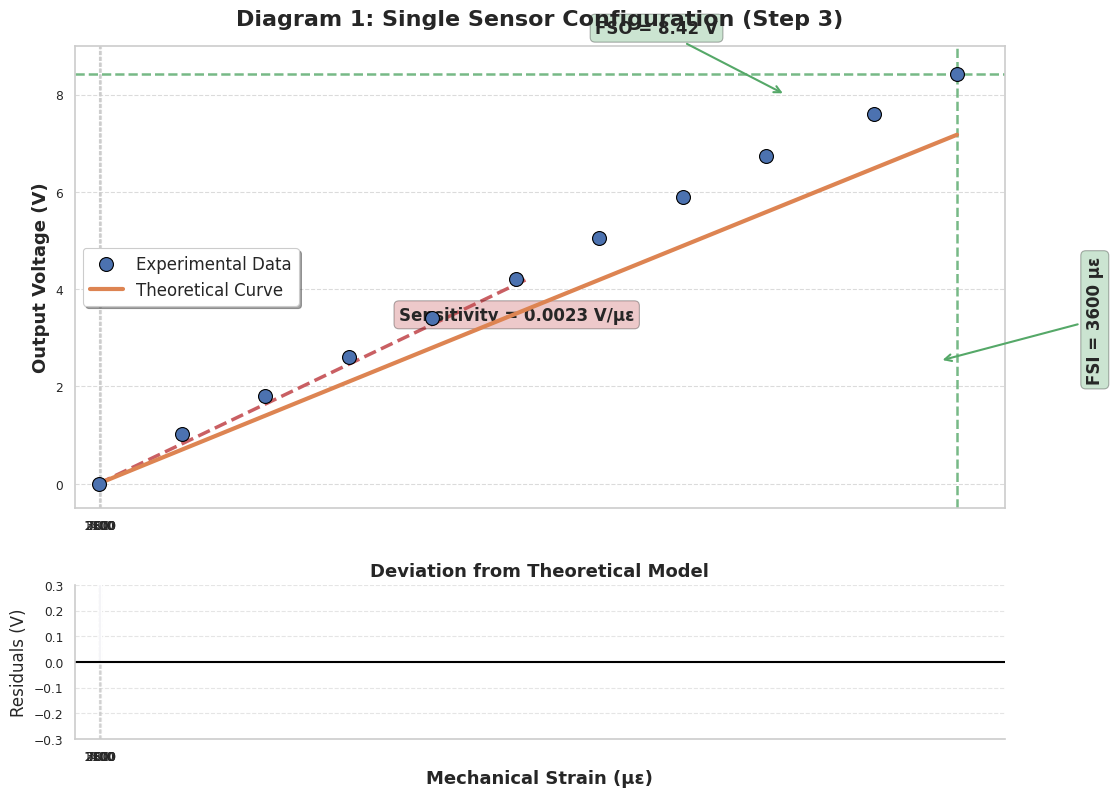

/tmp/ipython-input-4085790732.py:235: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


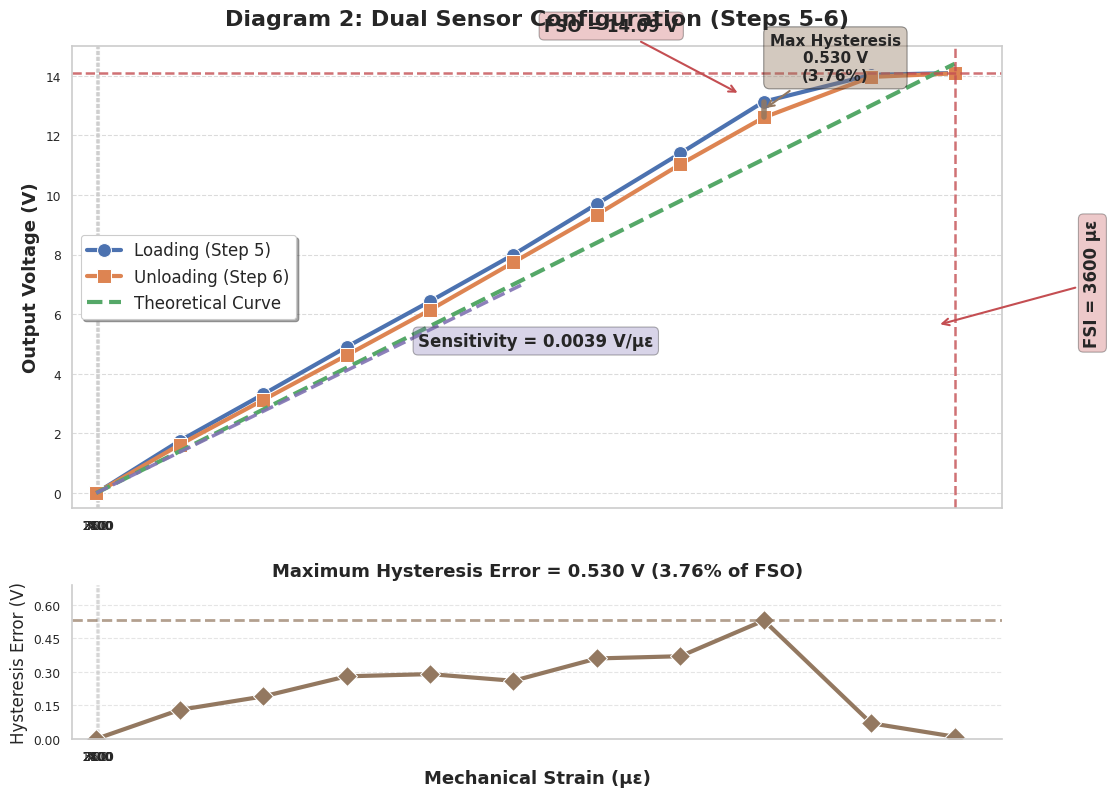

                SINGLE SENSOR CONFIGURATION (Step 3):                 
                   Full Scale Input (FSI): 3600 με                    
                   Full Scale Output (FSO): 8.42 V                    
                      Sensitivity: 0.00234 V/με                       
            Theoretical Sensitivity (ideal): 0.00200 V/με             
               
DUAL SENSOR CONFIGURATION (Steps 5-6):                
                   Full Scale Input (FSI): 3600 με                    
                   Full Scale Output (FSO): 14.09 V                   
                      Sensitivity: 0.00391 V/με                       
            Theoretical Sensitivity (ideal): 0.00400 V/με             
                 
Maximum Hysteresis Error: 0.5300 V                  
                Hysteresis as Percentage of FSO: 3.76%                
                     Observed at Strain: 2800 με                      
                       
SENSITIVITY COMPARISON:                       
      

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec

# Set seaborn style for professional appearance
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
sns.set_context("paper", rc={"grid.linewidth": 0.8, "axes.linewidth": 1.2})
colors = sns.color_palette("deep")

# ==============================
# DATA FROM EXPERIMENTS
# ==============================

# Table 1: Single sensor configuration (Step 3)
strain_single = np.array([0, 350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3250, 3600])  # in με
voltage_single = np.array([0, 1.01, 1.81, 2.61, 3.40, 4.20, 5.04, 5.89, 6.73, 7.59, 8.42])  # in V

# Table 2: Dual sensor configuration (Steps 5-6)
strain_dual = np.array([0, 350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3250, 3600])  # in με
voltage_loading = np.array([0, 1.75, 3.31, 4.90, 6.43, 8.00, 9.70, 11.40, 13.13, 14.03, 14.09])  # Loading (Step 5)
voltage_unloading = np.array([0, 1.62, 3.12, 4.62, 6.14, 7.74, 9.34, 11.03, 12.60, 13.96, 14.08])  # Unloading (Step 6)

# ==============================
# CALCULATIONS FOR SINGLE SENSOR
# ==============================
FSI_single = strain_single[-1]  # Full Scale Input = max strain = 3600 με
FSO_single = voltage_single[-1]  # Full Scale Output = output at FSI = 8.42 V
sensitivity_single = FSO_single / FSI_single  # Sensitivity in V/με

# Theoretical curve for single sensor configuration
G_f = 2.0  # Gauge factor
V_ex = 2.0  # Excitation voltage (V)
R = 120.0   # Base resistance (Ω)
Av = 2000   # Amplifier gain

def theoretical_voltage_single(strain_μe):
    """Calculate theoretical output voltage for single sensor configuration"""
    strain = strain_μe * 1e-6  # Convert με to unitless strain
    delta_R = G_f * R * strain      # Resistance change
    # Exact Wheatstone bridge formula for quarter bridge
    V_b = V_ex * (delta_R / (4 * R + 2 * delta_R))  # Bridge output voltage
    V_out = Av * V_b           # Amplified output
    return V_out

strain_fine = np.linspace(0, 3600, 100)  # Fine strain values for smooth curve
voltage_theoretical_single = theoretical_voltage_single(strain_fine)

# ==============================
# CALCULATIONS FOR DUAL SENSOR
# ==============================
FSI_dual = strain_dual[-1]  # Full Scale Input = 3600 με
FSO_dual = voltage_loading[-1]  # Full Scale Output (loading) = 14.09 V
sensitivity_dual = FSO_dual / FSI_dual  # Sensitivity in V/με

# Hysteresis calculation
hysteresis_diff = np.abs(voltage_loading - voltage_unloading)
max_hysteresis = np.max(hysteresis_diff)
max_hysteresis_idx = np.argmax(hysteresis_diff)
max_hysteresis_strain = strain_dual[max_hysteresis_idx]
hysteresis_percent = (max_hysteresis / FSO_dual) * 100

# Theoretical curve for dual sensor configuration
def theoretical_voltage_dual(strain_μe):
    """Calculate theoretical output voltage for dual sensor (half-bridge) configuration"""
    strain = strain_μe * 1e-6  # Convert με to unitless strain
    delta_R = G_f * R * strain      # Resistance change magnitude
    # Exact Wheatstone bridge formula for half-bridge differential
    V_b = V_ex * (2 * delta_R * R) / (4 * R**2 - delta_R**2)
    V_out = Av * V_b
    return V_out

voltage_theoretical_dual = theoretical_voltage_dual(strain_fine)

# ==============================
# PLOT 1: SINGLE SENSOR RESULTS WITH SEABORN STYLE
# ==============================
plt.figure(figsize=(12, 9))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.25)

# Main plot: Experimental vs Theoretical
ax1 = plt.subplot(gs[0])
sns.scatterplot(x=strain_single, y=voltage_single, s=100, color=colors[0], edgecolor='black',
                label='Experimental Data', ax=ax1, zorder=5)
sns.lineplot(x=strain_fine, y=voltage_theoretical_single, linewidth=3, color=colors[1],
             label='Theoretical Curve', ax=ax1, zorder=4)

ax1.set_ylabel('Output Voltage (V)', fontsize=13, fontweight='bold')
ax1.set_title('Diagram 1: Single Sensor Configuration (Step 3)', fontsize=16, fontweight='bold', pad=15)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='best', fontsize=12, frameon=True, shadow=True)

# Annotate FSI and FSO with seaborn-style annotations
ax1.axvline(x=FSI_single, color=colors[2], linestyle='--', alpha=0.8, linewidth=1.8)
ax1.axhline(y=FSO_single, color=colors[2], linestyle='--', alpha=0.8, linewidth=1.8)

# FSO Annotation with background
ax1.annotate(f'FSO = {FSO_single:.2f} V',
             xy=(FSI_single*0.8, FSO_single*0.95),
             xytext=(FSI_single*0.65, FSO_single*1.1),
             arrowprops=dict(arrowstyle='->', color=colors[2], lw=1.5),
             fontsize=12, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", fc=colors[2], ec="black", alpha=0.3),
             ha='center')

# FSI Annotation with background
ax1.annotate(f'FSI = {FSI_single} με',
             xy=(FSI_single*0.98, FSO_single*0.3),
             xytext=(FSI_single*1.15, FSO_single*0.4),
             arrowprops=dict(arrowstyle='->', color=colors[2], lw=1.5),
             fontsize=12, fontweight='bold', rotation=90,
             bbox=dict(boxstyle="round,pad=0.3", fc=colors[2], ec="black", alpha=0.3),
             va='center')

# Sensitivity annotation
mid_strain = FSI_single / 2
mid_voltage = sensitivity_single * mid_strain
ax1.plot([0, mid_strain], [0, mid_voltage], color=colors[3], linestyle='--', linewidth=2.5, alpha=0.9)
ax1.annotate(f'Sensitivity = {sensitivity_single:.4f} V/με',
             xy=(mid_strain*0.7, mid_voltage*0.8),
             fontsize=12, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", fc=colors[3], ec="black", alpha=0.3))

# Residuals plot with seaborn style
ax2 = plt.subplot(gs[1], sharex=ax1)
sns.barplot(x=strain_single, y=residuals, color=colors[4], alpha=0.8, ax=ax2)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax2.set_xlabel('Mechanical Strain (με)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Residuals (V)', fontsize=12)
ax2.set_title('Deviation from Theoretical Model', fontsize=13, fontweight='bold')
ax2.grid(True, linestyle='--', alpha=0.5)
sns.despine(ax=ax2)

# Improve x-axis ticks
ax2.set_xticks(np.arange(0, len(strain_single), 2))
ax2.set_xticklabels(strain_single[::2])

# Set limits for better visualization
ax1.set_xlim(-100, 3800)
ax1.set_ylim(-0.5, 9)
ax2.set_ylim(-0.3, 0.3)

plt.tight_layout()
plt.savefig('diagram1_single_sensor_seaborn.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# PLOT 2: DUAL SENSOR RESULTS WITH SEABORN STYLE
# ==============================
plt.figure(figsize=(12, 9))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.25)

# Main plot: Loading vs Unloading
ax1 = plt.subplot(gs[0])
sns.lineplot(x=strain_dual, y=voltage_loading, marker='o', markersize=10,
             linewidth=3, color=colors[0], label='Loading (Step 5)', ax=ax1)
sns.lineplot(x=strain_dual, y=voltage_unloading, marker='s', markersize=10,
             linewidth=3, color=colors[1], label='Unloading (Step 6)', ax=ax1)
sns.lineplot(x=strain_fine, y=voltage_theoretical_dual, linestyle='--',
             linewidth=3, color=colors[2], label='Theoretical Curve', ax=ax1)

ax1.set_ylabel('Output Voltage (V)', fontsize=13, fontweight='bold')
ax1.set_title('Diagram 2: Dual Sensor Configuration (Steps 5-6)', fontsize=16, fontweight='bold', pad=15)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='best', fontsize=12, frameon=True, shadow=True)

# Annotate FSI and FSO
ax1.axvline(x=FSI_dual, color=colors[3], linestyle='--', alpha=0.8, linewidth=1.8)
ax1.axhline(y=FSO_dual, color=colors[3], linestyle='--', alpha=0.8, linewidth=1.8)

# FSO Annotation
ax1.annotate(f'FSO = {FSO_dual:.2f} V',
             xy=(FSI_dual*0.75, FSO_dual*0.95),
             xytext=(FSI_dual*0.6, FSO_dual*1.1),
             arrowprops=dict(arrowstyle='->', color=colors[3], lw=1.5),
             fontsize=12, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", fc=colors[3], ec="black", alpha=0.3),
             ha='center')

# FSI Annotation
ax1.annotate(f'FSI = {FSI_dual} με',
             xy=(FSI_dual*0.98, FSO_dual*0.4),
             xytext=(FSI_dual*1.15, FSO_dual*0.5),
             arrowprops=dict(arrowstyle='->', color=colors[3], lw=1.5),
             fontsize=12, fontweight='bold', rotation=90,
             bbox=dict(boxstyle="round,pad=0.3", fc=colors[3], ec="black", alpha=0.3),
             va='center')

# Sensitivity annotation
mid_strain = FSI_dual / 2
mid_voltage = sensitivity_dual * mid_strain
ax1.plot([0, mid_strain], [0, mid_voltage], color=colors[4], linestyle='--', linewidth=2.5, alpha=0.9)
ax1.annotate(f'Sensitivity = {sensitivity_dual:.4f} V/με',
             xy=(mid_strain*0.75, mid_voltage*0.7),
             fontsize=12, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", fc=colors[4], ec="black", alpha=0.3))

# Hysteresis annotation
hyst_point_idx = np.argmax(hysteresis_diff)
hyst_strain = strain_dual[hyst_point_idx]
ax1.plot([hyst_strain, hyst_strain],
         [voltage_loading[hyst_point_idx], voltage_unloading[hyst_point_idx]],
         color=colors[5], linewidth=4, alpha=0.85)

ax1.annotate(f'Max Hysteresis\n{max_hysteresis:.3f} V\n({hysteresis_percent:.2f}%)',
             xy=(hyst_strain, (voltage_loading[hyst_point_idx] + voltage_unloading[hyst_point_idx])/2),
             xytext=(hyst_strain+300, (voltage_loading[hyst_point_idx] + voltage_unloading[hyst_point_idx])/2 + 1),
             arrowprops=dict(arrowstyle='->', color=colors[5], lw=1.5),
             fontsize=11, fontweight='bold', ha='center',
             bbox=dict(boxstyle="round,pad=0.4", fc=colors[5], ec="black", alpha=0.4))

# Hysteresis error plot
ax2 = plt.subplot(gs[1], sharex=ax1)
sns.lineplot(x=strain_dual, y=hysteresis_diff, marker='D', markersize=10,
             linewidth=3, color=colors[5], ax=ax2)
ax2.axhline(y=max_hysteresis, color=colors[5], linestyle='--', alpha=0.7, linewidth=2)
ax2.set_xlabel('Mechanical Strain (με)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Hysteresis Error (V)', fontsize=12)
ax2.set_title(f'Maximum Hysteresis Error = {max_hysteresis:.3f} V ({hysteresis_percent:.2f}% of FSO)',
              fontsize=13, fontweight='bold')
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.yaxis.set_major_locator(MaxNLocator(5))
sns.despine(ax=ax2)

# Improve x-axis ticks
ax2.set_xticks(np.arange(0, len(strain_dual), 2))
ax2.set_xticklabels(strain_dual[::2])

# Set limits for better visualization
ax1.set_xlim(-100, 3800)
ax1.set_ylim(-0.5, 15)
ax2.set_ylim(0, max_hysteresis*1.3)

plt.tight_layout()
plt.savefig('diagram2_dual_sensor_seaborn.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# CALCULATED VALUES SUMMARY
# ==============================
print("="*70)
print("SINGLE SENSOR CONFIGURATION (Step 3):".center(70))
print(f"Full Scale Input (FSI): {FSI_single} με".center(70))
print(f"Full Scale Output (FSO): {FSO_single:.2f} V".center(70))
print(f"Sensitivity: {sensitivity_single:.5f} V/με".center(70))
print(f"Theoretical Sensitivity (ideal): {0.002:.5f} V/με".center(70))

print("\nDUAL SENSOR CONFIGURATION (Steps 5-6):".center(70))
print(f"Full Scale Input (FSI): {FSI_dual} με".center(70))
print(f"Full Scale Output (FSO): {FSO_dual:.2f} V".center(70))
print(f"Sensitivity: {sensitivity_dual:.5f} V/με".center(70))
print(f"Theoretical Sensitivity (ideal): {0.004:.5f} V/με".center(70))
print(f"\nMaximum Hysteresis Error: {max_hysteresis:.4f} V".center(70))
print(f"Hysteresis as Percentage of FSO: {hysteresis_percent:.2f}%".center(70))
print(f"Observed at Strain: {max_hysteresis_strain} με".center(70))

print("\nSENSITIVITY COMPARISON:".center(70))
ratio = sensitivity_dual/sensitivity_single
print(f"Dual sensor sensitivity is {ratio:.2f}x higher than single sensor".center(70))
print("="*70)

/tmp/ipython-input-3559638747.py:211: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


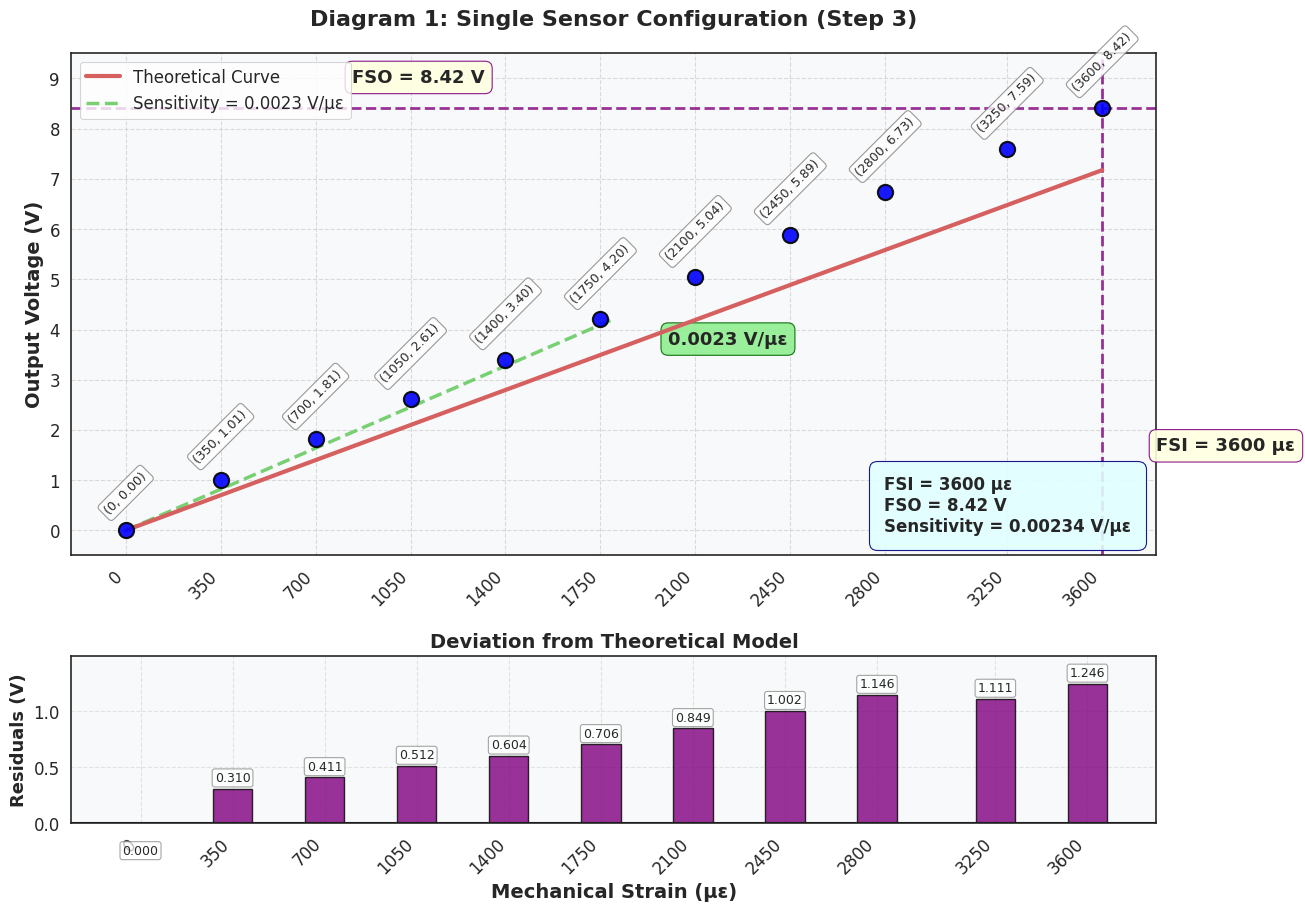

/tmp/ipython-input-3559638747.py:369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


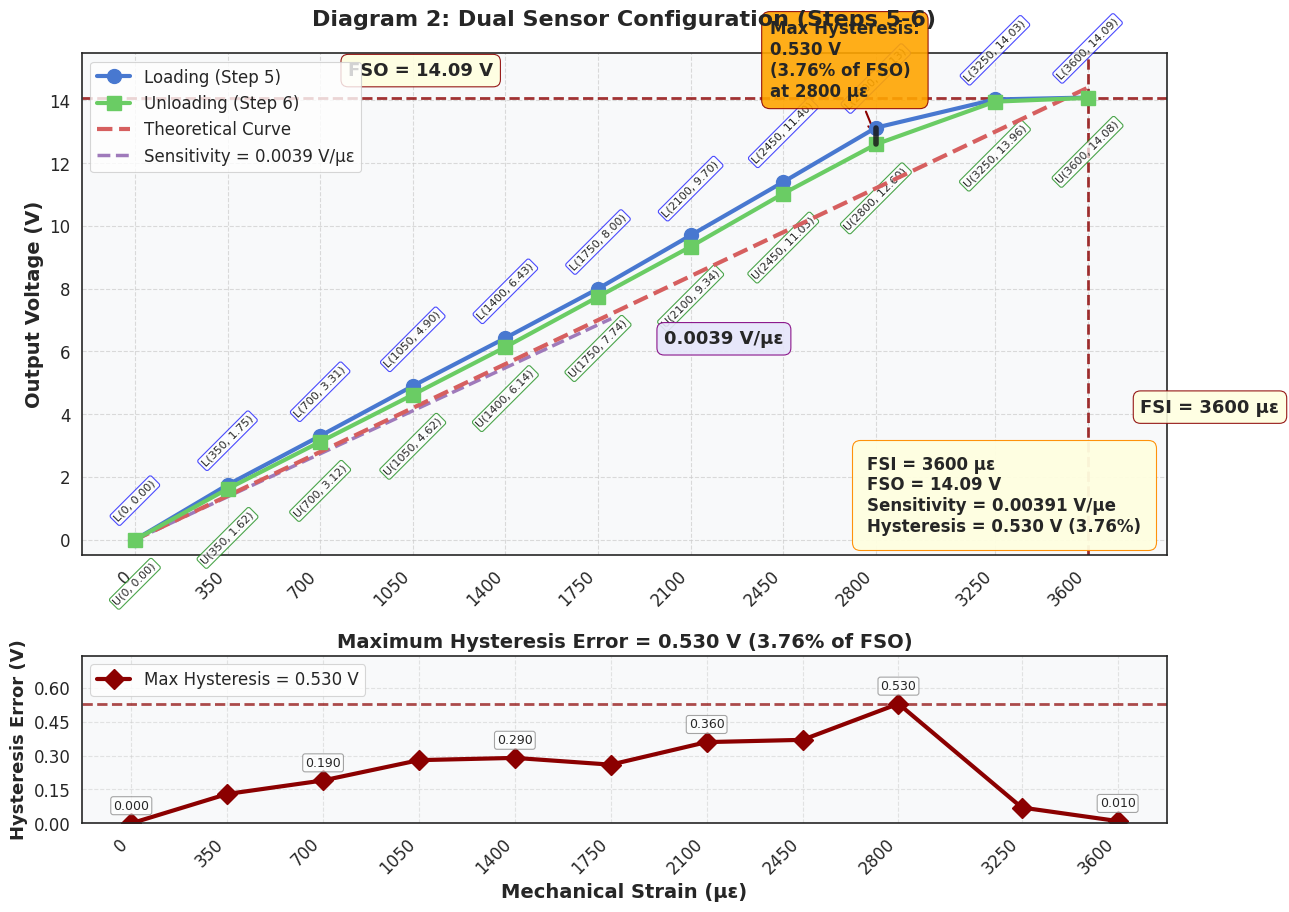


            SINGLE SENSOR CONFIGURATION (Step 3) - CALCULATED VALUES            
Full Scale Input (FSI):          3600 με
Full Scale Output (FSO):         8.4200 V
Sensitivity:                     0.002339 V/μe
Theoretical Sensitivity (ideal): 0.002000 V/μe
Maximum Residual Error:          1.2458 V

           DUAL SENSOR CONFIGURATION (Steps 5-6) - CALCULATED VALUES            
Full Scale Input (FSI):          3600 μe
Full Scale Output (FSO):         14.0900 V
Sensitivity:                     0.003914 V/μe
Theoretical Sensitivity (ideal): 0.004000 V/μe
Maximum Hysteresis Error:        0.5300 V
Hysteresis as % of FSO:          3.7615%
Hysteresis observed at strain:   2800 μe

                             SENSITIVITY COMPARISON                             
Dual sensor sensitivity is 1.67 times higher than single sensor
Theoretical improvement expected: 2.00 times


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FuncFormatter
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import AnchoredText

# Set professional seaborn style with increased font sizes
sns.set_style("whitegrid", {
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
    'axes.edgecolor': '.15',
    'axes.linewidth': 1.2
})
sns.set_palette("deep")
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})

# ==============================
# DATA FROM EXPERIMENTS
# ==============================

# Table 1: Single sensor configuration (Step 3)
strain_single = np.array([0, 350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3250, 3600])  # in με
voltage_single = np.array([0, 1.01, 1.81, 2.61, 3.40, 4.20, 5.04, 5.89, 6.73, 7.59, 8.42])  # in V

# Table 2: Dual sensor configuration (Steps 5-6)
strain_dual = np.array([0, 350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3250, 3600])  # in με
voltage_loading = np.array([0, 1.75, 3.31, 4.90, 6.43, 8.00, 9.70, 11.40, 13.13, 14.03, 14.09])  # Loading (Step 5)
voltage_unloading = np.array([0, 1.62, 3.12, 4.62, 6.14, 7.74, 9.34, 11.03, 12.60, 13.96, 14.08])  # Unloading (Step 6)

# ==============================
# CALCULATIONS FOR SINGLE SENSOR
# ==============================
FSI_single = strain_single[-1]  # Full Scale Input = max strain = 3600 με
FSO_single = voltage_single[-1]  # Full Scale Output = output at FSI = 8.42 V
sensitivity_single = FSO_single / FSI_single  # Sensitivity in V/με

# Theoretical curve for single sensor configuration
G_f = 2.0  # Gauge factor
V_ex = 2.0  # Excitation voltage (V)
R = 120.0   # Base resistance (Ω)
Av = 2000   # Amplifier gain

def theoretical_voltage_single(strain_μe):
    """Calculate theoretical output voltage for single sensor configuration"""
    strain = strain_μe * 1e-6  # Convert με to unitless strain
    delta_R = G_f * R * strain      # Resistance change
    # Exact Wheatstone bridge formula for quarter bridge
    V_b = V_ex * (delta_R / (4 * R + 2 * delta_R))  # Bridge output voltage
    V_out = Av * V_b           # Amplified output
    return V_out

strain_fine = np.linspace(0, 3600, 100)  # Fine strain values for smooth curve
voltage_theoretical_single = theoretical_voltage_single(strain_fine)

# Residuals for single sensor
residuals = voltage_single - theoretical_voltage_single(strain_single)

# ==============================
# CALCULATIONS FOR DUAL SENSOR
# ==============================
FSI_dual = strain_dual[-1]  # Full Scale Input = 3600 με
FSO_dual = voltage_loading[-1]  # Full Scale Output (loading) = 14.09 V
sensitivity_dual = FSO_dual / FSI_dual  # Sensitivity in V/μe

# Hysteresis calculation
hysteresis_diff = np.abs(voltage_loading - voltage_unloading)
max_hysteresis = np.max(hysteresis_diff)
max_hysteresis_idx = np.argmax(hysteresis_diff)
max_hysteresis_strain = strain_dual[max_hysteresis_idx]
hysteresis_percent = (max_hysteresis / FSO_dual) * 100

# Theoretical curve for dual sensor configuration
def theoretical_voltage_dual(strain_μe):
    """Calculate theoretical output voltage for dual sensor (half-bridge) configuration"""
    strain = strain_μe * 1e-6  # Convert με to unitless strain
    delta_R = G_f * R * strain      # Resistance change magnitude
    # Exact Wheatstone bridge formula for half-bridge differential
    V_b = V_ex * (2 * delta_R * R) / (4 * R**2 - delta_R**2)
    V_out = Av * V_b
    return V_out

voltage_theoretical_dual = theoretical_voltage_dual(strain_fine)

# ==============================
# PLOT 1: SINGLE SENSOR RESULTS
# ==============================
plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.3)

# Main plot: Experimental vs Theoretical
ax1 = plt.subplot(gs[0])
ax1.set_facecolor('#f8f9fa')  # Light gray background for better readability

# Plot experimental points with labels
scatter = ax1.scatter(strain_single, voltage_single, s=120, color='blue', edgecolor='black',
                     zorder=5, alpha=0.9, linewidth=1.5)

# Add value labels for each point
for i, (x, y) in enumerate(zip(strain_single, voltage_single)):
    ax1.annotate(f'({x}, {y:.2f})',
                (x, y),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                va='bottom',
                fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                rotation=45)

# Plot theoretical curve
ax1.plot(strain_fine, voltage_theoretical_single, 'r-', linewidth=3, label='Theoretical Curve', zorder=4)

ax1.set_ylabel('Output Voltage (V)', fontsize=14, fontweight='bold')
ax1.set_title('Diagram 1: Single Sensor Configuration (Step 3)', fontsize=16, fontweight='bold', pad=20)
ax1.grid(True, linestyle='--', alpha=0.7, which='both')
ax1.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, framealpha=0.95)

# Annotate FSI and FSO with dedicated arrows
ax1.axvline(x=FSI_single, color='purple', linestyle='--', alpha=0.8, linewidth=2)
ax1.axhline(y=FSO_single, color='purple', linestyle='--', alpha=0.8, linewidth=2)

# FSO Annotation at the top
ax1.annotate(f'FSO = {FSO_single:.2f} V',
             xy=(FSI_single*0.3, FSO_single),
             xytext=(FSI_single*0.3, FSO_single + 0.5),
             ha='center',
             fontsize=13, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.4", fc="lightyellow", ec="purple", alpha=0.9))

# FSI Annotation on the right
ax1.annotate(f'FSI = {FSI_single} με',
             xy=(FSI_single, FSO_single*0.2),
             xytext=(FSI_single + 200, FSO_single*0.2),
             va='center',
             fontsize=13, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.4", fc="lightyellow", ec="purple", alpha=0.9))

# Sensitivity line and annotation
mid_strain = FSI_single / 2
mid_voltage = sensitivity_single * mid_strain
sens_line = ax1.plot([0, mid_strain], [0, mid_voltage], 'g--', linewidth=2.5, alpha=0.9, label=f'Sensitivity = {sensitivity_single:.4f} V/με')[0]

# Sensitivity annotation at the end of the line
ax1.annotate(f'{sensitivity_single:.4f} V/με',
             xy=(mid_strain, mid_voltage),
             xytext=(mid_strain + 200, mid_voltage - 0.5),
             fontsize=13, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.4", fc="lightgreen", ec="darkgreen", alpha=0.9))

ax1.legend(loc='upper left', fontsize=12)

# Set axis limits with padding
ax1.set_xlim(-200, 3800)
ax1.set_ylim(-0.5, 9.5)
ax1.xaxis.set_major_locator(MaxNLocator(10))
ax1.yaxis.set_major_locator(MaxNLocator(10))

# Format x-axis to show all ticks
ax1.set_xticks(strain_single)
ax1.set_xticklabels(strain_single, rotation=45, ha='right')

# Residuals plot
ax2 = plt.subplot(gs[1], facecolor='#f8f9fa')
bars = ax2.bar(strain_single, residuals, width=150, color='purple', alpha=0.8, edgecolor='black', linewidth=1)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3) if height > 0 else (0, -15),
                textcoords="offset points",
                ha='center', va='bottom' if height > 0 else 'top',
                fontsize=9,
                bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.7))

ax2.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax2.set_xlabel('Mechanical Strain (με)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Residuals (V)', fontsize=13)
ax2.set_title('Deviation from Theoretical Model', fontsize=14, fontweight='bold')
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.set_ylim(min(residuals)*1.2, max(residuals)*1.2)
ax2.set_xticks(strain_single)
ax2.set_xticklabels(strain_single, rotation=45, ha='right')

# Summary box with key parameters
summary_text = (f"FSI = {FSI_single} με\n"
                f"FSO = {FSO_single:.2f} V\n"
                f"Sensitivity = {sensitivity_single:.5f} V/με")
anchored_text = AnchoredText(summary_text, loc='lower right', frameon=True,
                           bbox_to_anchor=(0.99, 0.01),
                           bbox_transform=ax1.transAxes,
                           prop=dict(size=12, weight='bold'))
anchored_text.patch.set_boxstyle("round,pad=0.5")
anchored_text.patch.set_facecolor('lightcyan')
anchored_text.patch.set_edgecolor('navy')
anchored_text.patch.set_alpha(0.9)
ax1.add_artist(anchored_text)

plt.tight_layout()
plt.savefig('diagram1_single_sensor_seaborn.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# PLOT 2: DUAL SENSOR RESULTS
# ==============================
plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.3)

# Main plot: Loading vs Unloading
ax1 = plt.subplot(gs[0])
ax1.set_facecolor('#f8f9fa')

# Plot loading and unloading data with value labels
loading_plot = ax1.plot(strain_dual, voltage_loading, 'bo-', markersize=10, linewidth=3,
                       label='Loading (Step 5)', zorder=5)
unloading_plot = ax1.plot(strain_dual, voltage_unloading, 'gs-', markersize=10, linewidth=3,
                         label='Unloading (Step 6)', zorder=5)

# Add value labels for loading points
for i, (x, y) in enumerate(zip(strain_dual, voltage_loading)):
    ax1.annotate(f'L({x}, {y:.2f})',
                (x, y),
                xytext=(0, 12),
                textcoords='offset points',
                ha='center',
                va='bottom',
                fontsize=8,
                bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="blue", alpha=0.7),
                rotation=45)

# Add value labels for unloading points
for i, (x, y) in enumerate(zip(strain_dual, voltage_unloading)):
    ax1.annotate(f'U({x}, {y:.2f})',
                (x, y),
                xytext=(0, -15),
                textcoords='offset points',
                ha='center',
                va='top',
                fontsize=8,
                bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="green", alpha=0.7),
                rotation=45)

# Plot theoretical curve
ax1.plot(strain_fine, voltage_theoretical_dual, 'r--', linewidth=3, label='Theoretical Curve', zorder=4)

ax1.set_ylabel('Output Voltage (V)', fontsize=14, fontweight='bold')
ax1.set_title('Diagram 2: Dual Sensor Configuration (Steps 5-6)', fontsize=16, fontweight='bold', pad=20)
ax1.grid(True, linestyle='--', alpha=0.7, which='both')
ax1.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, framealpha=0.95)

# Annotate FSI and FSO
ax1.axvline(x=FSI_dual, color='darkred', linestyle='--', alpha=0.8, linewidth=2)
ax1.axhline(y=FSO_dual, color='darkred', linestyle='--', alpha=0.8, linewidth=2)

# FSO Annotation
ax1.annotate(f'FSO = {FSO_dual:.2f} V',
             xy=(FSI_dual*0.3, FSO_dual),
             xytext=(FSI_dual*0.3, FSO_dual + 0.7),
             ha='center',
             fontsize=13, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.4", fc="lightyellow", ec="darkred", alpha=0.9))

# FSI Annotation
ax1.annotate(f'FSI = {FSI_dual} με',
             xy=(FSI_dual, FSO_dual*0.3),
             xytext=(FSI_dual + 200, FSO_dual*0.3),
             va='center',
             fontsize=13, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.4", fc="lightyellow", ec="darkred", alpha=0.9))

# Sensitivity line and annotation
mid_strain = FSI_dual / 2
mid_voltage = sensitivity_dual * mid_strain
sens_line = ax1.plot([0, mid_strain], [0, mid_voltage], 'm--', linewidth=2.5, alpha=0.9, label=f'Sensitivity = {sensitivity_dual:.4f} V/με')[0]

# Sensitivity annotation
ax1.annotate(f'{sensitivity_dual:.4f} V/με',
             xy=(mid_strain, mid_voltage),
             xytext=(mid_strain + 200, mid_voltage - 0.8),
             fontsize=13, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.4", fc="lavender", ec="purple", alpha=0.9))

# Hysteresis annotation - only at the maximum point
ax1.plot([max_hysteresis_strain, max_hysteresis_strain],
         [voltage_loading[max_hysteresis_idx], voltage_unloading[max_hysteresis_idx]],
         'k-', linewidth=4, alpha=0.85, zorder=10)

# Hysteresis annotation box
hyst_text = (f'Max Hysteresis:\n'
             f'{max_hysteresis:.3f} V\n'
             f'({hysteresis_percent:.2f}% of FSO)\n'
             f'at {max_hysteresis_strain} με')

ax1.annotate(hyst_text,
             xy=(max_hysteresis_strain, (voltage_loading[max_hysteresis_idx] + voltage_unloading[max_hysteresis_idx])/2),
             xytext=(max_hysteresis_strain - 400, voltage_loading[max_hysteresis_idx] + 1),
             fontsize=12, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.5", fc="orange", ec="darkred", alpha=0.9),
             arrowprops=dict(arrowstyle='->', color='darkred', lw=1.5))

ax1.legend(loc='upper left', fontsize=12)

# Set axis limits with padding
ax1.set_xlim(-200, 3900)
ax1.set_ylim(-0.5, 15.5)
ax1.xaxis.set_major_locator(MaxNLocator(10))
ax1.yaxis.set_major_locator(MaxNLocator(10))

# Format x-axis to show all ticks
ax1.set_xticks(strain_dual)
ax1.set_xticklabels(strain_dual, rotation=45, ha='right')

# Hysteresis error plot
ax2 = plt.subplot(gs[1], facecolor='#f8f9fa')
hyst_plot = ax2.plot(strain_dual, hysteresis_diff, 'D-', color='darkred', markersize=10, linewidth=3,
                    label=f'Max Hysteresis = {max_hysteresis:.3f} V')
ax2.axhline(y=max_hysteresis, color='darkred', linestyle='--', alpha=0.7, linewidth=2)

# Add value labels for hysteresis points
for i, (x, y) in enumerate(zip(strain_dual, hysteresis_diff)):
    if i % 2 == 0:  # Only label every other point to avoid crowding
        ax2.annotate(f'{y:.3f}',
                    (x, y),
                    xytext=(0, 8),
                    textcoords='offset points',
                    ha='center',
                    va='bottom',
                    fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.7))

ax2.set_xlabel('Mechanical Strain (με)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Hysteresis Error (V)', fontsize=13)
ax2.set_title(f'Maximum Hysteresis Error = {max_hysteresis:.3f} V ({hysteresis_percent:.2f}% of FSO)',
              fontsize=14, fontweight='bold')
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend(loc='upper left', fontsize=12)
ax2.set_ylim(0, max_hysteresis*1.4)
ax2.set_xticks(strain_dual)
ax2.set_xticklabels(strain_dual, rotation=45, ha='right')
ax2.yaxis.set_major_locator(MaxNLocator(6))

# Summary box with key parameters
summary_text = (f"FSI = {FSI_dual} με\n"
                f"FSO = {FSO_dual:.2f} V\n"
                f"Sensitivity = {sensitivity_dual:.5f} V/μe\n"
                f"Hysteresis = {max_hysteresis:.3f} V ({hysteresis_percent:.2f}%)")
anchored_text = AnchoredText(summary_text, loc='lower right', frameon=True,
                           bbox_to_anchor=(0.99, 0.01),
                           bbox_transform=ax1.transAxes,
                           prop=dict(size=12, weight='bold'))
anchored_text.patch.set_boxstyle("round,pad=0.5")
anchored_text.patch.set_facecolor('lightyellow')
anchored_text.patch.set_edgecolor('darkorange')
anchored_text.patch.set_alpha(0.95)
ax1.add_artist(anchored_text)

plt.tight_layout()
plt.savefig('diagram2_dual_sensor_seaborn.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# CALCULATED VALUES SUMMARY
# ==============================
print("\n" + "="*80)
print("SINGLE SENSOR CONFIGURATION (Step 3) - CALCULATED VALUES".center(80))
print("="*80)
print(f"Full Scale Input (FSI):          {FSI_single} με")
print(f"Full Scale Output (FSO):         {FSO_single:.4f} V")
print(f"Sensitivity:                     {sensitivity_single:.6f} V/μe")
print(f"Theoretical Sensitivity (ideal): 0.002000 V/μe")
print(f"Maximum Residual Error:          {np.max(np.abs(residuals)):.4f} V")

print("\n" + "="*80)
print("DUAL SENSOR CONFIGURATION (Steps 5-6) - CALCULATED VALUES".center(80))
print("="*80)
print(f"Full Scale Input (FSI):          {FSI_dual} μe")
print(f"Full Scale Output (FSO):         {FSO_dual:.4f} V")
print(f"Sensitivity:                     {sensitivity_dual:.6f} V/μe")
print(f"Theoretical Sensitivity (ideal): 0.004000 V/μe")
print(f"Maximum Hysteresis Error:        {max_hysteresis:.4f} V")
print(f"Hysteresis as % of FSO:          {hysteresis_percent:.4f}%")
print(f"Hysteresis observed at strain:   {max_hysteresis_strain} μe")

print("\n" + "="*80)
print("SENSITIVITY COMPARISON".center(80))
print("="*80)
sensitivity_ratio = sensitivity_dual / sensitivity_single
print(f"Dual sensor sensitivity is {sensitivity_ratio:.2f} times higher than single sensor")
print(f"Theoretical improvement expected: 2.00 times")
print("="*80)

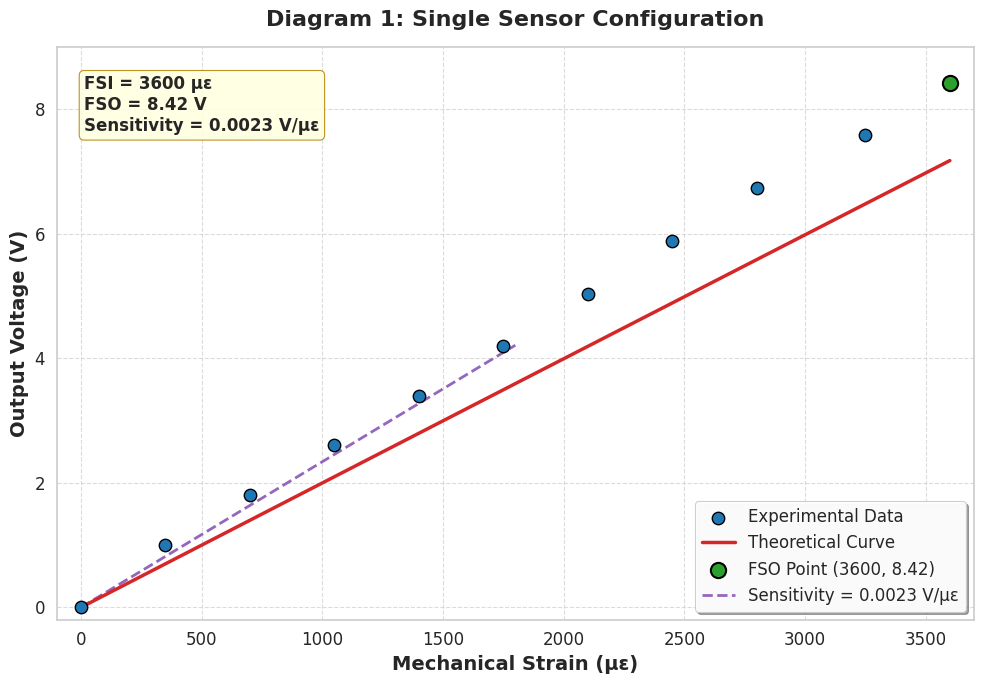

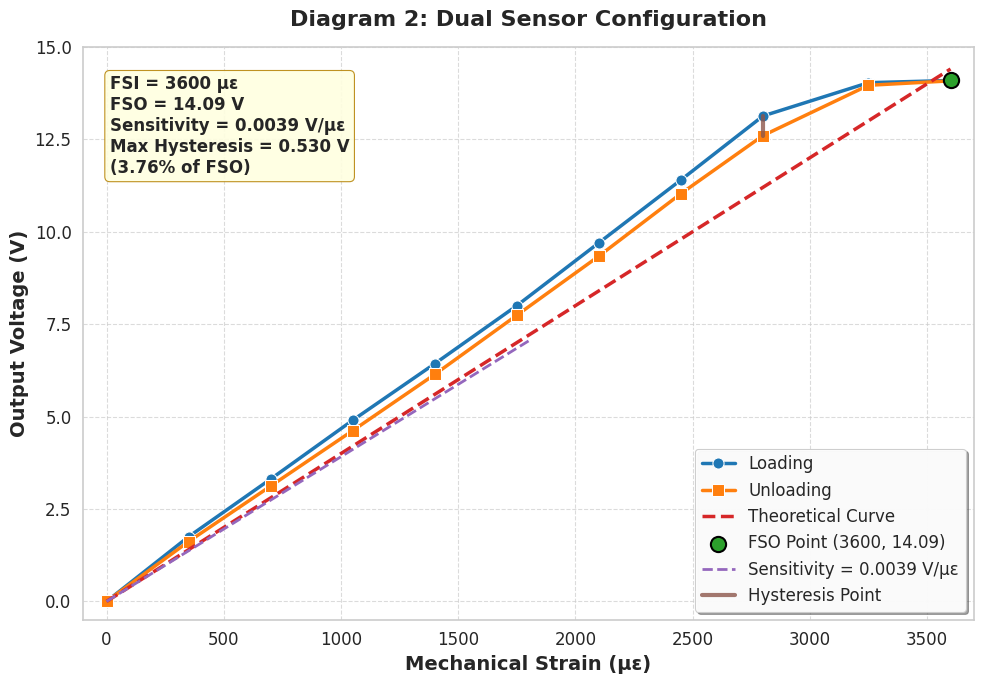


                  SINGLE SENSOR CONFIGURATION VALUES                  
Full Scale Input (FSI):  3600 με
Full Scale Output (FSO): 8.4200 V
Sensitivity:             0.002339 V/με
Theoretical Sensitivity: 0.002000 V/με

                   DUAL SENSOR CONFIGURATION VALUES                   
Full Scale Input (FSI):  3600 με
Full Scale Output (FSO): 14.0900 V
Sensitivity:             0.003914 V/με
Theoretical Sensitivity: 0.004000 V/με
Max Hysteresis Error:    0.5300 V (3.76% of FSO)
Hysteresis at strain:    2800 με

                            KEY COMPARISON                            
Dual sensor sensitivity is 1.67x higher than single sensor
Theoretical improvement expected: 2.00x


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Set clean professional style
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.3})
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (10, 7),
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})

# ==============================
# DATA FROM EXPERIMENTS
# ==============================

# Table 1: Single sensor configuration (Step 3)
strain_single = np.array([0, 350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3250, 3600])  # in με
voltage_single = np.array([0, 1.01, 1.81, 2.61, 3.40, 4.20, 5.04, 5.89, 6.73, 7.59, 8.42])  # in V

# Table 2: Dual sensor configuration (Steps 5-6)
strain_dual = np.array([0, 350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3250, 3600])  # in με
voltage_loading = np.array([0, 1.75, 3.31, 4.90, 6.43, 8.00, 9.70, 11.40, 13.13, 14.03, 14.09])  # Loading (Step 5)
voltage_unloading = np.array([0, 1.62, 3.12, 4.62, 6.14, 7.74, 9.34, 11.03, 12.60, 13.96, 14.08])  # Unloading (Step 6)

# ==============================
# CALCULATIONS FOR SINGLE SENSOR
# ==============================
FSI_single = strain_single[-1]  # Full Scale Input = max strain = 3600 με
FSO_single = voltage_single[-1]  # Full Scale Output = output at FSI = 8.42 V
sensitivity_single = FSO_single / FSI_single  # Sensitivity in V/με

# Theoretical curve for single sensor configuration
G_f = 2.0  # Gauge factor
V_ex = 2.0  # Excitation voltage (V)
R = 120.0   # Base resistance (Ω)
Av = 2000   # Amplifier gain

def theoretical_voltage_single(strain_μe):
    """Calculate theoretical output voltage for single sensor configuration"""
    strain = strain_μe * 1e-6  # Convert με to unitless strain
    delta_R = G_f * R * strain      # Resistance change
    # Exact Wheatstone bridge formula for quarter bridge
    V_b = V_ex * (delta_R / (4 * R + 2 * delta_R))  # Bridge output voltage
    V_out = Av * V_b           # Amplified output
    return V_out

strain_fine = np.linspace(0, 3600, 100)  # Fine strain values for smooth curve
voltage_theoretical_single = theoretical_voltage_single(strain_fine)

# ==============================
# PLOT 1: SINGLE SENSOR RESULTS (CLEAN VERSION)
# ==============================
plt.figure(figsize=(10, 7))
ax = plt.gca()
ax.set_facecolor('white')

# Plot experimental data and theoretical curve
sns.scatterplot(x=strain_single, y=voltage_single, s=80, color='#1f77b4', edgecolor='black',
                linewidth=1, label='Experimental Data', zorder=5)
sns.lineplot(x=strain_fine, y=voltage_theoretical_single, color='#d62728', linewidth=2.5,
             label='Theoretical Curve', zorder=4)

# Mark FSI and FSO points clearly
ax.scatter([FSI_single], [FSO_single], s=120, color='#2ca02c', edgecolor='black',
           linewidth=1.5, zorder=6, label=f'FSO Point ({FSI_single}, {FSO_single:.2f})')

# Draw sensitivity line from origin to midpoint
mid_strain = FSI_single / 2
mid_voltage = sensitivity_single * mid_strain
ax.plot([0, mid_strain], [0, mid_voltage], color='#9467bd', linestyle='--', linewidth=2,
        label=f'Sensitivity = {sensitivity_single:.4f} V/μ\u03B5')

# Set labels and title
ax.set_xlabel('Mechanical Strain (\u03BC\u03B5)', fontsize=14, fontweight='bold')
ax.set_ylabel('Output Voltage (V)', fontsize=14, fontweight='bold')
ax.set_title('Diagram 1: Single Sensor Configuration', fontsize=16, fontweight='bold', pad=15)

# Set axis limits with appropriate padding
ax.set_xlim(-100, 3700)
ax.set_ylim(-0.2, 9)

# Format ticks to show all strain values but without overcrowding
ax.set_xticks(np.arange(0, 3700, 500))
ax.xaxis.set_major_locator(MaxNLocator(8))
ax.yaxis.set_major_locator(MaxNLocator(6))

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Create a clean legend in the best position
ax.legend(loc='best', frameon=True, shadow=True, framealpha=0.95)

# Add a text box with key parameters in the corner
textstr = (f'FSI = {FSI_single} \u03BC\u03B5\n'
           f'FSO = {FSO_single:.2f} V\n'
           f'Sensitivity = {sensitivity_single:.4f} V/\u03BC\u03B5')
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9, edgecolor='darkgoldenrod')
ax.text(0.03, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props, fontweight='bold')

plt.tight_layout()
plt.savefig('diagram1_single_sensor_clean.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# CALCULATIONS FOR DUAL SENSOR
# ==============================
FSI_dual = strain_dual[-1]  # Full Scale Input = 3600 με
FSO_dual = voltage_loading[-1]  # Full Scale Output (loading) = 14.09 V
sensitivity_dual = FSO_dual / FSI_dual  # Sensitivity in V/μe

# Hysteresis calculation
hysteresis_diff = np.abs(voltage_loading - voltage_unloading)
max_hysteresis = np.max(hysteresis_diff)
max_hysteresis_idx = np.argmax(hysteresis_diff)
max_hysteresis_strain = strain_dual[max_hysteresis_idx]
hysteresis_percent = (max_hysteresis / FSO_dual) * 100

def theoretical_voltage_dual(strain_μe):
    """Calculate theoretical output voltage for dual sensor (half-bridge) configuration"""
    strain = strain_μe * 1e-6  # Convert με to unitless strain
    delta_R = G_f * R * strain      # Resistance change magnitude
    # Exact Wheatstone bridge formula for half-bridge differential
    V_b = V_ex * (2 * delta_R * R) / (4 * R**2 - delta_R**2)
    V_out = Av * V_b
    return V_out

voltage_theoretical_dual = theoretical_voltage_dual(strain_fine)

# ==============================
# PLOT 2: DUAL SENSOR RESULTS (CLEAN VERSION)
# ==============================
plt.figure(figsize=(10, 7))
ax = plt.gca()
ax.set_facecolor('white')

# Plot loading and unloading curves
sns.lineplot(x=strain_dual, y=voltage_loading, marker='o', markersize=8,
             linewidth=2.5, color='#1f77b4', label='Loading')
sns.lineplot(x=strain_dual, y=voltage_unloading, marker='s', markersize=8,
             linewidth=2.5, color='#ff7f0e', label='Unloading')
sns.lineplot(x=strain_fine, y=voltage_theoretical_dual, color='#d62728', linestyle='--',
             linewidth=2.5, label='Theoretical Curve')

# Mark FSI and FSO points
ax.scatter([FSI_dual], [FSO_dual], s=120, color='#2ca02c', edgecolor='black',
           linewidth=1.5, zorder=6, label=f'FSO Point ({FSI_dual}, {FSO_dual:.2f})')

# Draw sensitivity line
mid_strain = FSI_dual / 2
mid_voltage = sensitivity_dual * mid_strain
ax.plot([0, mid_strain], [0, mid_voltage], color='#9467bd', linestyle='--', linewidth=2,
        label=f'Sensitivity = {sensitivity_dual:.4f} V/μ\u03B5')

# Highlight maximum hysteresis point
ax.plot([max_hysteresis_strain, max_hysteresis_strain],
        [voltage_loading[max_hysteresis_idx], voltage_unloading[max_hysteresis_idx]],
        color='#8c564b', linewidth=3, alpha=0.8, label='Hysteresis Point')

# Set labels and title
ax.set_xlabel('Mechanical Strain (\u03BC\u03B5)', fontsize=14, fontweight='bold')
ax.set_ylabel('Output Voltage (V)', fontsize=14, fontweight='bold')
ax.set_title('Diagram 2: Dual Sensor Configuration', fontsize=16, fontweight='bold', pad=15)

# Set axis limits with padding
ax.set_xlim(-100, 3700)
ax.set_ylim(-0.5, 15)

# Format ticks
ax.set_xticks(np.arange(0, 3700, 500))
ax.xaxis.set_major_locator(MaxNLocator(8))
ax.yaxis.set_major_locator(MaxNLocator(7))

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Create legend
ax.legend(loc='best', frameon=True, shadow=True, framealpha=0.95)

# Add text box with key parameters
textstr = (f'FSI = {FSI_dual} \u03BC\u03B5\n'
           f'FSO = {FSO_dual:.2f} V\n'
           f'Sensitivity = {sensitivity_dual:.4f} V/\u03BC\u03B5\n'
           f'Max Hysteresis = {max_hysteresis:.3f} V\n'
           f'({hysteresis_percent:.2f}% of FSO)')
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9, edgecolor='darkgoldenrod')
ax.text(0.03, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props, fontweight='bold')

plt.tight_layout()
plt.savefig('diagram2_dual_sensor_clean.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# CALCULATED VALUES SUMMARY
# ==============================
print("\n" + "="*70)
print("SINGLE SENSOR CONFIGURATION VALUES".center(70))
print("="*70)
print(f"Full Scale Input (FSI):  {FSI_single} με")
print(f"Full Scale Output (FSO): {FSO_single:.4f} V")
print(f"Sensitivity:             {sensitivity_single:.6f} V/με")
print(f"Theoretical Sensitivity: 0.002000 V/με")

print("\n" + "="*70)
print("DUAL SENSOR CONFIGURATION VALUES".center(70))
print("="*70)
print(f"Full Scale Input (FSI):  {FSI_dual} με")
print(f"Full Scale Output (FSO): {FSO_dual:.4f} V")
print(f"Sensitivity:             {sensitivity_dual:.6f} V/με")
print(f"Theoretical Sensitivity: 0.004000 V/με")
print(f"Max Hysteresis Error:    {max_hysteresis:.4f} V ({hysteresis_percent:.2f}% of FSO)")
print(f"Hysteresis at strain:    {max_hysteresis_strain} με")

print("\n" + "="*70)
print("KEY COMPARISON".center(70))
print("="*70)
sensitivity_ratio = sensitivity_dual / sensitivity_single
print(f"Dual sensor sensitivity is {sensitivity_ratio:.2f}x higher than single sensor")
print(f"Theoretical improvement expected: 2.00x")
print("="*70)

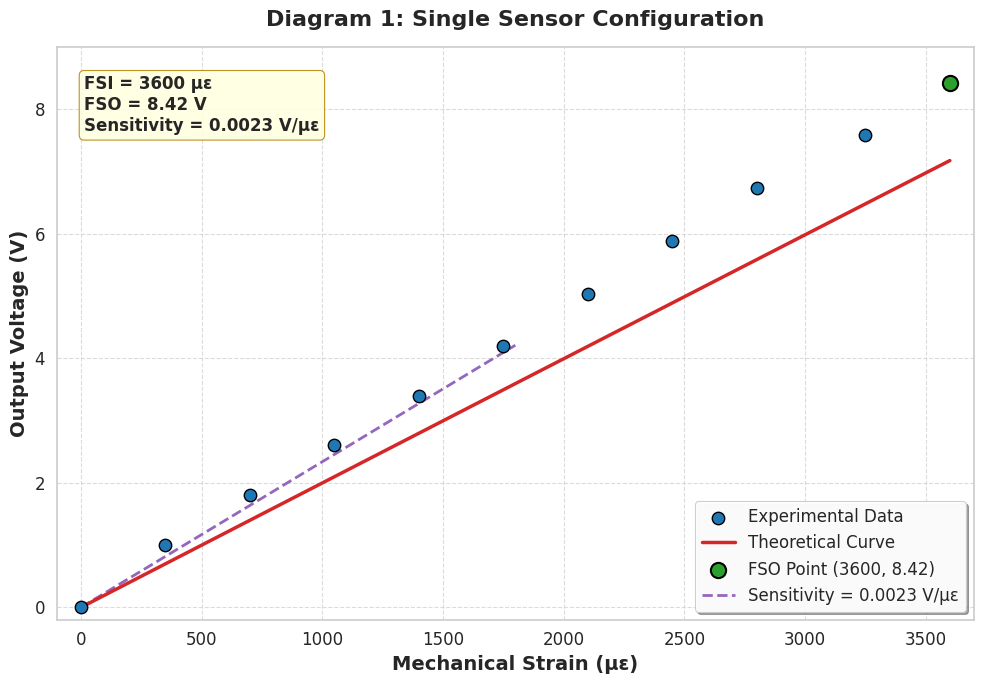

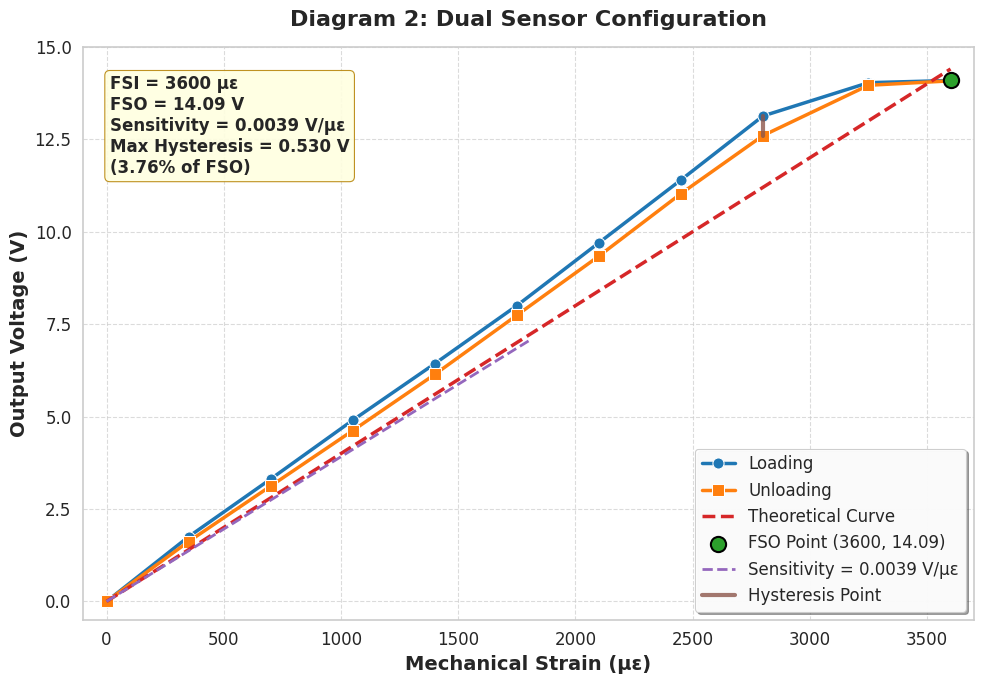


                  SINGLE SENSOR CONFIGURATION VALUES                  
Full Scale Input (FSI):  3600 με
Full Scale Output (FSO): 8.4200 V
Sensitivity:             0.002339 V/με
Theoretical Sensitivity: 0.002000 V/με

                   DUAL SENSOR CONFIGURATION VALUES                   
Full Scale Input (FSI):  3600 με
Full Scale Output (FSO): 14.0900 V
Sensitivity:             0.003914 V/με
Theoretical Sensitivity: 0.004000 V/με
Max Hysteresis Error:    0.5300 V (3.76% of FSO)
Hysteresis at strain:    2800 με

                            KEY COMPARISON                            
Dual sensor sensitivity is 1.67x higher than single sensor
Theoretical improvement expected: 2.00x


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Set clean professional style
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.3})
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (10, 7),
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})

# ==============================
# DATA FROM EXPERIMENTS
# ==============================

# Table 1: Single sensor configuration (Step 3)
strain_single = np.array([0, 350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3250, 3600])  # in με
voltage_single = np.array([0, 1.01, 1.81, 2.61, 3.40, 4.20, 5.04, 5.89, 6.73, 7.59, 8.42])  # in V

# Table 2: Dual sensor configuration (Steps 5-6)
strain_dual = np.array([0, 350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3250, 3600])  # in με
voltage_loading = np.array([0, 1.75, 3.31, 4.90, 6.43, 8.00, 9.70, 11.40, 13.13, 14.03, 14.09])  # Loading (Step 5)
voltage_unloading = np.array([0, 1.62, 3.12, 4.62, 6.14, 7.74, 9.34, 11.03, 12.60, 13.96, 14.08])  # Unloading (Step 6)

# ==============================
# CALCULATIONS FOR SINGLE SENSOR
# ==============================
FSI_single = strain_single[-1]  # Full Scale Input = max strain = 3600 με
FSO_single = voltage_single[-1]  # Full Scale Output = output at FSI = 8.42 V
sensitivity_single = FSO_single / FSI_single  # Sensitivity in V/με

# Theoretical curve for single sensor configuration
G_f = 2.0  # Gauge factor
V_ex = 2.0  # Excitation voltage (V)
R = 120.0   # Base resistance (Ω)
Av = 2000   # Amplifier gain

def theoretical_voltage_single(strain_μe):
    """Calculate theoretical output voltage for single sensor configuration"""
    strain = strain_μe * 1e-6  # Convert με to unitless strain
    delta_R = G_f * R * strain      # Resistance change
    # Exact Wheatstone bridge formula for quarter bridge
    V_b = V_ex * (delta_R / (4 * R + 2 * delta_R))  # Bridge output voltage
    V_out = Av * V_b           # Amplified output
    return V_out

strain_fine = np.linspace(0, 3600, 100)  # Fine strain values for smooth curve
voltage_theoretical_single = theoretical_voltage_single(strain_fine)

# ==============================
# PLOT 1: SINGLE SENSOR RESULTS (CLEAN VERSION)
# ==============================
plt.figure(figsize=(10, 7))
ax = plt.gca()
ax.set_facecolor('white')

# Plot experimental data and theoretical curve
sns.scatterplot(x=strain_single, y=voltage_single, s=80, color='#1f77b4', edgecolor='black',
                linewidth=1, label='Experimental Data', zorder=5)
sns.lineplot(x=strain_fine, y=voltage_theoretical_single, color='#d62728', linewidth=2.5,
             label='Theoretical Curve', zorder=4)

# Mark FSI and FSO points clearly
ax.scatter([FSI_single], [FSO_single], s=120, color='#2ca02c', edgecolor='black',
           linewidth=1.5, zorder=6, label=f'FSO Point ({FSI_single}, {FSO_single:.2f})')

# Draw sensitivity line from origin to midpoint
mid_strain = FSI_single / 2
mid_voltage = sensitivity_single * mid_strain
ax.plot([0, mid_strain], [0, mid_voltage], color='#9467bd', linestyle='--', linewidth=2,
        label=f'Sensitivity = {sensitivity_single:.4f} V/μ\u03B5')

# Set labels and title
ax.set_xlabel('Mechanical Strain (\u03BC\u03B5)', fontsize=14, fontweight='bold')
ax.set_ylabel('Output Voltage (V)', fontsize=14, fontweight='bold')
ax.set_title('Diagram 1: Single Sensor Configuration', fontsize=16, fontweight='bold', pad=15)

# Set axis limits with appropriate padding
ax.set_xlim(-100, 3700)
ax.set_ylim(-0.2, 9)

# Format ticks to show all strain values but without overcrowding
ax.set_xticks(np.arange(0, 3700, 500))
ax.xaxis.set_major_locator(MaxNLocator(8))
ax.yaxis.set_major_locator(MaxNLocator(6))

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Create a clean legend in the best position
ax.legend(loc='best', frameon=True, shadow=True, framealpha=0.95)

# Add a text box with key parameters in the corner
textstr = (f'FSI = {FSI_single} \u03BC\u03B5\n'
           f'FSO = {FSO_single:.2f} V\n'
           f'Sensitivity = {sensitivity_single:.4f} V/\u03BC\u03B5')
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9, edgecolor='darkgoldenrod')
ax.text(0.03, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props, fontweight='bold')

plt.tight_layout()
plt.savefig('diagram1_single_sensor_clean.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# CALCULATIONS FOR DUAL SENSOR
# ==============================
FSI_dual = strain_dual[-1]  # Full Scale Input = 3600 με
FSO_dual = voltage_loading[-1]  # Full Scale Output (loading) = 14.09 V
sensitivity_dual = FSO_dual / FSI_dual  # Sensitivity in V/μe

# Hysteresis calculation
hysteresis_diff = np.abs(voltage_loading - voltage_unloading)
max_hysteresis = np.max(hysteresis_diff)
max_hysteresis_idx = np.argmax(hysteresis_diff)
max_hysteresis_strain = strain_dual[max_hysteresis_idx]
hysteresis_percent = (max_hysteresis / FSO_dual) * 100

def theoretical_voltage_dual(strain_μe):
    """Calculate theoretical output voltage for dual sensor (half-bridge) configuration"""
    strain = strain_μe * 1e-6  # Convert με to unitless strain
    delta_R = G_f * R * strain      # Resistance change magnitude
    # Exact Wheatstone bridge formula for half-bridge differential
    V_b = V_ex * (2 * delta_R * R) / (4 * R**2 - delta_R**2)
    V_out = Av * V_b
    return V_out

voltage_theoretical_dual = theoretical_voltage_dual(strain_fine)

# ==============================
# PLOT 2: DUAL SENSOR RESULTS (CLEAN VERSION)
# ==============================
plt.figure(figsize=(10, 7))
ax = plt.gca()
ax.set_facecolor('white')

# Plot loading and unloading curves
sns.lineplot(x=strain_dual, y=voltage_loading, marker='o', markersize=8,
             linewidth=2.5, color='#1f77b4', label='Loading')
sns.lineplot(x=strain_dual, y=voltage_unloading, marker='s', markersize=8,
             linewidth=2.5, color='#ff7f0e', label='Unloading')
sns.lineplot(x=strain_fine, y=voltage_theoretical_dual, color='#d62728', linestyle='--',
             linewidth=2.5, label='Theoretical Curve')

# Mark FSI and FSO points
ax.scatter([FSI_dual], [FSO_dual], s=120, color='#2ca02c', edgecolor='black',
           linewidth=1.5, zorder=6, label=f'FSO Point ({FSI_dual}, {FSO_dual:.2f})')

# Draw sensitivity line
mid_strain = FSI_dual / 2
mid_voltage = sensitivity_dual * mid_strain
ax.plot([0, mid_strain], [0, mid_voltage], color='#9467bd', linestyle='--', linewidth=2,
        label=f'Sensitivity = {sensitivity_dual:.4f} V/μ\u03B5')

# Highlight maximum hysteresis point
ax.plot([max_hysteresis_strain, max_hysteresis_strain],
        [voltage_loading[max_hysteresis_idx], voltage_unloading[max_hysteresis_idx]],
        color='#8c564b', linewidth=3, alpha=0.8, label='Hysteresis Point')

# Set labels and title
ax.set_xlabel('Mechanical Strain (\u03BC\u03B5)', fontsize=14, fontweight='bold')
ax.set_ylabel('Output Voltage (V)', fontsize=14, fontweight='bold')
ax.set_title('Diagram 2: Dual Sensor Configuration', fontsize=16, fontweight='bold', pad=15)

# Set axis limits with padding
ax.set_xlim(-100, 3700)
ax.set_ylim(-0.5, 15)

# Format ticks
ax.set_xticks(np.arange(0, 3700, 500))
ax.xaxis.set_major_locator(MaxNLocator(8))
ax.yaxis.set_major_locator(MaxNLocator(7))

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Create legend
ax.legend(loc='best', frameon=True, shadow=True, framealpha=0.95)

# Add text box with key parameters
textstr = (f'FSI = {FSI_dual} \u03BC\u03B5\n'
           f'FSO = {FSO_dual:.2f} V\n'
           f'Sensitivity = {sensitivity_dual:.4f} V/\u03BC\u03B5\n'
           f'Max Hysteresis = {max_hysteresis:.3f} V\n'
           f'({hysteresis_percent:.2f}% of FSO)')
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9, edgecolor='darkgoldenrod')
ax.text(0.03, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props, fontweight='bold')

plt.tight_layout()
plt.savefig('diagram2_dual_sensor_clean.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# CALCULATED VALUES SUMMARY
# ==============================
print("\n" + "="*70)
print("SINGLE SENSOR CONFIGURATION VALUES".center(70))
print("="*70)
print(f"Full Scale Input (FSI):  {FSI_single} με")
print(f"Full Scale Output (FSO): {FSO_single:.4f} V")
print(f"Sensitivity:             {sensitivity_single:.6f} V/με")
print(f"Theoretical Sensitivity: 0.002000 V/με")

print("\n" + "="*70)
print("DUAL SENSOR CONFIGURATION VALUES".center(70))
print("="*70)
print(f"Full Scale Input (FSI):  {FSI_dual} με")
print(f"Full Scale Output (FSO): {FSO_dual:.4f} V")
print(f"Sensitivity:             {sensitivity_dual:.6f} V/με")
print(f"Theoretical Sensitivity: 0.004000 V/με")
print(f"Max Hysteresis Error:    {max_hysteresis:.4f} V ({hysteresis_percent:.2f}% of FSO)")
print(f"Hysteresis at strain:    {max_hysteresis_strain} με")

print("\n" + "="*70)
print("KEY COMPARISON".center(70))
print("="*70)
sensitivity_ratio = sensitivity_dual / sensitivity_single
print(f"Dual sensor sensitivity is {sensitivity_ratio:.2f}x higher than single sensor")
print(f"Theoretical improvement expected: 2.00x")
print("="*70)

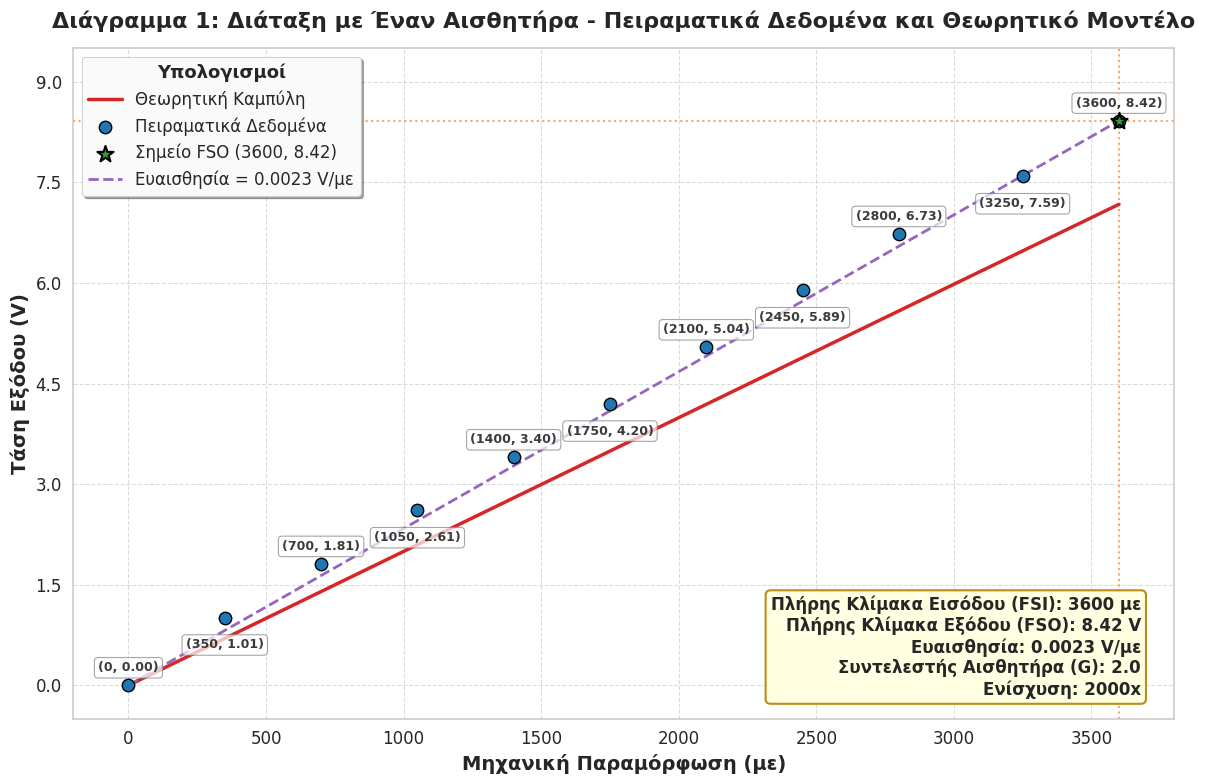

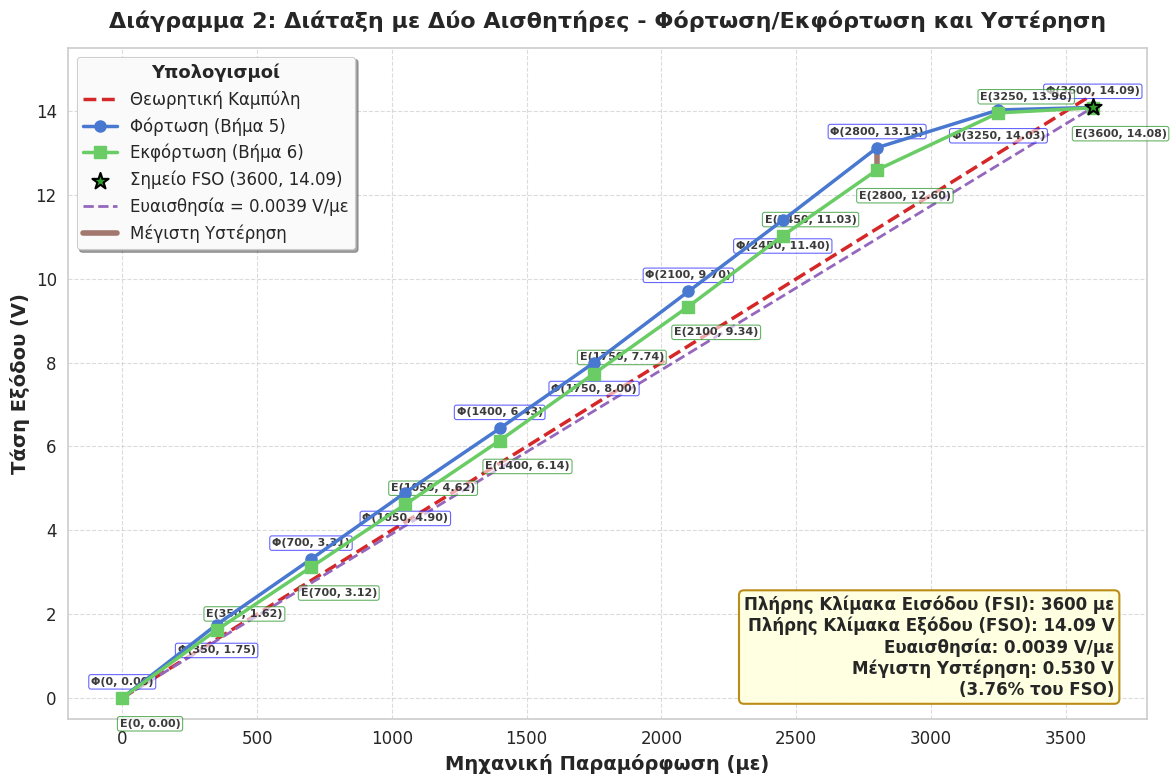


                  ΥΠΟΛΟΓΙΣΜΟΙ ΓΙΑ ΤΗ ΔΙΑΤΑΞΗ ΜΕ ΕΝΑΝ ΑΙΣΘΗΤΗΡΑ                  
Πλήρης Κλίμακα Εισόδου (FSI):  3600 με
Πλήρης Κλίμακα Εξόδου (FSO): 8.4200 V
Ευαισθησία:                  0.002339 V/με
Θεωρητική Ευαισθησία:        0.002000 V/με

                  ΥΠΟΛΟΓΙΣΜΟΙ ΓΙΑ ΤΗ ΔΙΑΤΑΞΗ ΜΕ ΔΥΟ ΑΙΣΘΗΤΗΡΕΣ                  
Πλήρης Κλίμακα Εισόδου (FSI):  3600 με
Πλήρης Κλίμακα Εξόδου (FSO): 14.0900 V
Ευαισθησία:                  0.003914 V/με
Θεωρητική Ευαισθησία:        0.004000 V/με
Μέγιστο Σφάλμα Υστέρησης:    0.5300 V (3.76% του FSO)

                            ΣΥΓΚΡΙΤΙΚΑ ΑΠΟΤΕΛΕΣΜΑΤΑ                             
Η ευαισθησία της διάταξης με δύο αισθητήρες είναι 1.67 φορές μεγαλύτερη
Θεωρητική βελτίωση που αναμενόταν: 2.00 φορές


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.font_manager as fm

# Ρύθμιση για εμφάνιση ελληνικών χαρακτήρων
plt.rcParams['font.family'] = 'DejaVu Sans'  # Ή άλλη γραμματοσειρά που υποστηρίζει ελληνικούς χαρακτήρες
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (12, 8),
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})

# Καθαρό επαγγελματικό στυλ
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.3})

# ==============================
# ΔΕΔΟΜΕΝΑ ΑΠΟ ΤΑ ΠΕΙΡΑΜΑΤΑ
# ==============================

# Πίνακας 1: Διάταξη με έναν αισθητήρα (Βήμα 3)
strain_single = np.array([0, 350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3250, 3600])  # σε με
voltage_single = np.array([0, 1.01, 1.81, 2.61, 3.40, 4.20, 5.04, 5.89, 6.73, 7.59, 8.42])  # σε V

# Πίνακας 2: Διάταξη με δύο αισθητήρες (Βήματα 5-6)
strain_dual = np.array([0, 350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3250, 3600])  # σε με
voltage_loading = np.array([0, 1.75, 3.31, 4.90, 6.43, 8.00, 9.70, 11.40, 13.13, 14.03, 14.09])  # Φόρτωση (Βήμα 5)
voltage_unloading = np.array([0, 1.62, 3.12, 4.62, 6.14, 7.74, 9.34, 11.03, 12.60, 13.96, 14.08])  # Εκφόρτωση (Βήμα 6)

# ==============================
# ΥΠΟΛΟΓΙΣΜΟΙ ΓΙΑ ΤΗ ΜΟΝΗ ΑΙΣΘΗΤΗΡΑ
# ==============================
FSI_single = strain_single[-1]  # Πλήρης Κλίμακα Εισόδου = μέγιστη παραμόρφωση = 3600 με
FSO_single = voltage_single[-1]  # Πλήρης Κλίμακα Εξόδου = έξοδος στο FSI = 8.42 V
sensitivity_single = FSO_single / FSI_single  # Ευαισθησία σε V/με

# Θεωρητική καμπύλη για τη διάταξη με έναν αισθητήρα
G_f = 2.0  # Συντελεστής αισθητήρα
V_ex = 2.0  # Τάση διέγερσης (V)
R = 120.0   # Αντίσταση βάσης (Ω)
Av = 2000   # Κέρδος ενισχυτή

def theoretical_voltage_single(strain_με):
    """Υπολογισμός θεωρητικής τάσης εξόδου για διάταξη με έναν αισθητήρα"""
    strain = strain_με * 1e-6  # Μετατροπή με σε αδιάστατη παραμόρφωση
    delta_R = G_f * R * strain      # Αλλαγή αντίστασης
    # Ακριβής φόρμουλα γέφυρας Wheatstone για τετραμερή γέφυρα
    V_b = V_ex * (delta_R / (4 * R + 2 * delta_R))  # Τάση εξόδου γέφυρας
    V_out = Av * V_b           # Ενισχυμένη έξοδος
    return V_out

strain_fine = np.linspace(0, 3600, 100)  # Λεπτές τιμές παραμόρφωσης για ομαλή καμπύλη
voltage_theoretical_single = theoretical_voltage_single(strain_fine)

# ==============================
# ΓΡΑΦΙΚΗ 1: ΜΟΝΟΣ ΑΙΣΘΗΤΗΡΑΣ ΜΕ ΟΛΕΣ ΤΙΣ ΤΙΜΕΣ ΣΗΜΕΙΩΝ
# ==============================
plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.set_facecolor('white')

# Θεωρητική καμπύλη (παρασκήνιο)
sns.lineplot(x=strain_fine, y=voltage_theoretical_single, color='#d62728', linewidth=2.5,
             label='Θεωρητική Καμπύλη', zorder=2)

# Πειραματικά σημεία με σαφείς δείκτες
scatter = ax.scatter(strain_single, voltage_single, s=80, color='#1f77b4', edgecolor='black',
                     linewidth=1, zorder=5, label='Πειραματικά Δεδομένα')

# Επισήμανση σημείων FSI και FSO με ειδικούς δείκτες
ax.scatter([FSI_single], [FSO_single], s=150, color='#2ca02c', edgecolor='black',
           linewidth=1.5, zorder=6, marker='*', label=f'Σημείο FSO ({FSI_single}, {FSO_single:.2f})')

# Γραμμή ευαισθησίας από την αρχή στο σημείο FSO
ax.plot([0, FSI_single], [0, FSO_single], color='#9467bd', linestyle='--', linewidth=2,
        label=f'Ευαισθησία = {sensitivity_single:.4f} V/μ\u03B5')

# Οριζόντιες και κάθετες γραμμές για FSI και FSO
ax.axvline(x=FSI_single, color='#ff7f0e', linestyle=':', linewidth=1.5, alpha=0.7, zorder=1)
ax.axhline(y=FSO_single, color='#ff7f0e', linestyle=':', linewidth=1.5, alpha=0.7, zorder=1)

# Προσθήκη ετικετών για ΚΑΘΕ σημείο με τις συντεταγμένες (x,y)
for i, (x, y) in enumerate(zip(strain_single, voltage_single)):
    # Προσαρμογή θέσης ετικέτας για αποφυγή επικάλυψης
    offset_x = 0
    offset_y = 8 if i % 2 == 0 else -15

    ax.annotate(f'({x}, {y:.2f})',
               (x, y),
               xytext=(offset_x, offset_y),
               textcoords='offset points',
               ha='center',
               va='bottom' if i % 2 == 0 else 'top',
               fontsize=9,
               alpha=0.9,
               bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7),
               fontweight='bold')

# Ονομασίες αξόνων και τίτλος
ax.set_xlabel('Μηχανική Παραμόρφωση (\u03BC\u03B5)', fontsize=14, fontweight='bold')
ax.set_ylabel('Τάση Εξόδου (V)', fontsize=14, fontweight='bold')
ax.set_title('Διάγραμμα 1: Διάταξη με Έναν Αισθητήρα - Πειραματικά Δεδομένα και Θεωρητικό Μοντέλο',
             fontsize=16, fontweight='bold', pad=15)

# Όρια αξόνων με περιθώριο
ax.set_xlim(-200, 3800)
ax.set_ylim(-0.5, 9.5)

# Ρύθμιση ticks
ax.set_xticks(np.arange(0, 3800, 500))
ax.xaxis.set_major_locator(MaxNLocator(9))
ax.yaxis.set_major_locator(MaxNLocator(7))

# Πλέγμα για καλύτερη αναγνωσιμότητα
ax.grid(True, linestyle='--', alpha=0.7)

# Πλαίσιο υπολογισμών στην κάτω δεξιά γωνία
textstr = (f'Πλήρης Κλίμακα Εισόδου (FSI): {FSI_single} \u03BC\u03B5\n'
           f'Πλήρης Κλίμακα Εξόδου (FSO): {FSO_single:.2f} V\n'
           f'Ευαισθησία: {sensitivity_single:.4f} V/\u03BC\u03B5\n'
           f'Συντελεστής Αισθητήρα (G): {G_f}\n'
           f'Ενίσχυση: {Av}x')
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.95,
             edgecolor='darkgoldenrod', linewidth=1.5)
ax.text(0.97, 0.03, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='bottom', horizontalalignment='right',
        bbox=props, fontweight='bold')

# Τοποθέτηση legend σε κατάλληλη θέση
ax.legend(loc='upper left', frameon=True, shadow=True, framealpha=0.95,
         title='Υπολογισμοί',
         title_fontproperties={'weight': 'bold', 'size': 13})

plt.tight_layout()
plt.savefig('diagram1_single_sensor_greek.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# ΓΡΑΦΙΚΗ 2: ΔΙΠΛΟΣ ΑΙΣΘΗΤΗΡΑΣ ΜΕ ΟΛΑ ΤΑ ΣΗΜΕΙΑ ΚΑΙ ΥΣΤΕΡΗΣΗ
# ==============================
plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.set_facecolor('white')

# Θεωρητική καμπύλη
def theoretical_voltage_dual(strain_με):
    """Υπολογισμός θεωρητικής τάσης εξόδου για διάταξη με δύο αισθητήρες (ημιγέφυρα)"""
    strain = strain_με * 1e-6  # Μετατροπή με σε αδιάστατη παραμόρφωση
    delta_R = G_f * R * strain      # Μέγεθος αλλαγής αντίστασης
    # Ακριβής φόρμουλα γέφυρας Wheatstone για διαφορική ημιγέφυρα
    V_b = V_ex * (2 * delta_R * R) / (4 * R**2 - delta_R**2)
    V_out = Av * V_b
    return V_out

sns.lineplot(x=strain_fine, y=theoretical_voltage_dual(strain_fine), color='#d62728',
             linestyle='--', linewidth=2.5, label='Θεωρητική Καμπύλη', zorder=2)

# Πειραματικά δεδομένα φόρτωσης/εκφόρτωσης
ax.plot(strain_dual, voltage_loading, 'bo-', markersize=8, linewidth=2.5,
        label='Φόρτωση (Βήμα 5)', zorder=5)
ax.plot(strain_dual, voltage_unloading, 'gs-', markersize=8, linewidth=2.5,
        label='Εκφόρτωση (Βήμα 6)', zorder=5)

# Επισήμανση FSI και FSO
FSI_dual = strain_dual[-1]
FSO_dual = voltage_loading[-1]
sensitivity_dual = FSO_dual / FSI_dual

ax.scatter([FSI_dual], [FSO_dual], s=150, color='#2ca02c', edgecolor='black',
           linewidth=1.5, zorder=6, marker='*', label=f'Σημείο FSO ({FSI_dual}, {FSO_dual:.2f})')

# Γραμμή ευαισθησίας
ax.plot([0, FSI_dual], [0, FSO_dual], color='#9467bd', linestyle='--', linewidth=2,
        label=f'Ευαισθησία = {sensitivity_dual:.4f} V/μ\u03B5')

# Υπολογισμός υστέρησης
hysteresis_diff = np.abs(voltage_loading - voltage_unloading)
max_hysteresis = np.max(hysteresis_diff)
max_hysteresis_idx = np.argmax(hysteresis_diff)
max_hysteresis_strain = strain_dual[max_hysteresis_idx]
hysteresis_percent = (max_hysteresis / FSO_dual) * 100

# Επισήμανση μέγιστης υστέρησης
ax.plot([max_hysteresis_strain, max_hysteresis_strain],
        [voltage_loading[max_hysteresis_idx], voltage_unloading[max_hysteresis_idx]],
        color='#8c564b', linewidth=4, alpha=0.8, label='Μέγιστη Υστέρηση')

# Ετικέτες για ΚΑΘΕ σημείο φόρτωσης
for i, (x, y) in enumerate(zip(strain_dual, voltage_loading)):
    offset_y = 8 if i % 2 == 0 else -15
    ax.annotate(f'Φ({x}, {y:.2f})',
               (x, y),
               xytext=(0, offset_y),
               textcoords='offset points',
               ha='center',
               va='bottom' if i % 2 == 0 else 'top',
               fontsize=8,
               alpha=0.9,
               bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="blue", alpha=0.6),
               fontweight='bold')

# Ετικέτες για ΚΑΘΕ σημείο εκφόρτωσης
for i, (x, y) in enumerate(zip(strain_dual, voltage_unloading)):
    offset_y = 8 if i % 2 == 1 else -15
    ax.annotate(f'Ε({x}, {y:.2f})',
               (x, y),
               xytext=(20, offset_y),
               textcoords='offset points',
               ha='center',
               va='bottom' if i % 2 == 1 else 'top',
               fontsize=8,
               alpha=0.9,
               bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="green", alpha=0.6),
               fontweight='bold')

# Ονομασίες αξόνων και τίτλος
ax.set_xlabel('Μηχανική Παραμόρφωση (\u03BC\u03B5)', fontsize=14, fontweight='bold')
ax.set_ylabel('Τάση Εξόδου (V)', fontsize=14, fontweight='bold')
ax.set_title('Διάγραμμα 2: Διάταξη με Δύο Αισθητήρες - Φόρτωση/Εκφόρτωση και Υστέρηση',
             fontsize=16, fontweight='bold', pad=15)

# Όρια αξόνων με περιθώριο
ax.set_xlim(-200, 3800)
ax.set_ylim(-0.5, 15.5)

# Ρύθμιση ticks
ax.set_xticks(np.arange(0, 3800, 500))
ax.xaxis.set_major_locator(MaxNLocator(9))
ax.yaxis.set_major_locator(MaxNLocator(8))

# Πλέγμα
ax.grid(True, linestyle='--', alpha=0.7)

# Πλαίσιο υπολογισμών
textstr = (f'Πλήρης Κλίμακα Εισόδου (FSI): {FSI_dual} \u03BC\u03B5\n'
           f'Πλήρης Κλίμακα Εξόδου (FSO): {FSO_dual:.2f} V\n'
           f'Ευαισθησία: {sensitivity_dual:.4f} V/\u03BC\u03B5\n'
           f'Μέγιστη Υστέρηση: {max_hysteresis:.3f} V\n'
           f'({hysteresis_percent:.2f}% του FSO)')
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.95,
             edgecolor='darkgoldenrod', linewidth=1.5)
ax.text(0.97, 0.03, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='bottom', horizontalalignment='right',
        bbox=props, fontweight='bold')

# Τοποθέτηση legend
ax.legend(loc='upper left', frameon=True, shadow=True, framealpha=0.95,
         title='Υπολογισμοί',
         title_fontproperties={'weight': 'bold', 'size': 13})

plt.tight_layout()
plt.savefig('diagram2_dual_sensor_greek.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# ΠΕΡΙΛΗΨΗ ΥΠΟΛΟΓΙΣΜΩΝ
# ==============================
print("\n" + "="*80)
print("ΥΠΟΛΟΓΙΣΜΟΙ ΓΙΑ ΤΗ ΔΙΑΤΑΞΗ ΜΕ ΕΝΑΝ ΑΙΣΘΗΤΗΡΑ".center(80))
print("="*80)
print(f"Πλήρης Κλίμακα Εισόδου (FSI):  {FSI_single} με")
print(f"Πλήρης Κλίμακα Εξόδου (FSO): {FSO_single:.4f} V")
print(f"Ευαισθησία:                  {sensitivity_single:.6f} V/με")
print(f"Θεωρητική Ευαισθησία:        0.002000 V/με")

print("\n" + "="*80)
print("ΥΠΟΛΟΓΙΣΜΟΙ ΓΙΑ ΤΗ ΔΙΑΤΑΞΗ ΜΕ ΔΥΟ ΑΙΣΘΗΤΗΡΕΣ".center(80))
print("="*80)
print(f"Πλήρης Κλίμακα Εισόδου (FSI):  {FSI_dual} με")
print(f"Πλήρης Κλίμακα Εξόδου (FSO): {FSO_dual:.4f} V")
print(f"Ευαισθησία:                  {sensitivity_dual:.6f} V/με")
print(f"Θεωρητική Ευαισθησία:        0.004000 V/με")
print(f"Μέγιστο Σφάλμα Υστέρησης:    {max_hysteresis:.4f} V ({hysteresis_percent:.2f}% του FSO)")

print("\n" + "="*80)
print("ΣΥΓΚΡΙΤΙΚΑ ΑΠΟΤΕΛΕΣΜΑΤΑ".center(80))
print("="*80)
sensitivity_ratio = sensitivity_dual / sensitivity_single
print(f"Η ευαισθησία της διάταξης με δύο αισθητήρες είναι {sensitivity_ratio:.2f} φορές μεγαλύτερη")
print(f"Θεωρητική βελτίωση που αναμενόταν: 2.00 φορές")
print("="*80)